## draw phylo tree monaghan

In [5]:
library("ape")
library("phytools")
#library(seqinr)
library("RColorBrewer")
library(dplyr)
source('~/gitprojects/snipgenie/notebooks/drawtrees.R')

In [6]:
cladecolors <- c(
  '1'= "#4AA60E",
  '2'= "#BDDC28",
  '3'= "#F34DA5",
  '4'= "#0969A2",
  '5'= "#FF8C00",
  '6' = "#FF3D00",
  '7' = "#5b9b71",  
  '8' = "#79ecdd",
  '9' = "#5ACDF1",
  '10' = "#A62800",
  '11' = "#bbbbbb",
  '12' = "#C3E0E4",
  '13' = "#CF7143",
  '14' = "#CFA127",
  '15' = "#C029C5",
  '16'="#989c0e",
  '17'="#FFC073",
  '18'="#f1ee57"
)

## metadata

In [7]:
meta <- read.table('/storage/btbgenie/all_ireland_results/metadata.csv',sep=',',header=TRUE,row.names=1,comment.char="")
meta[] <- lapply(meta, as.character)
meta$Year <- as.numeric(meta$Year)
meta$Lineage <- factor(meta$Level.1, levels = sort(as.numeric(unique(meta$Level.1))))
meta$clades <- paste(meta$lineage,meta$GB_clade)
row_names <- row.names(meta)

In [8]:
meta <- meta %>%
  group_by(short_name) %>%
  mutate(clade_size = n()) %>%
  ungroup() %>%
  as.data.frame() 
rownames(meta) <- row_names

In [9]:
rd <- read.table('/storage/btbgenie/all_ireland_results/rd.csv',sep=',',header=TRUE,row.names=1,comment.char="")
rd[] <- lapply(rd, as.character)
rd2 <- read.table('/storage/btbgenie/all_ireland_results/rd_mbovis.csv',sep=',',header=TRUE,row.names=1,comment.char="")
rd2[] <- lapply(rd2, as.character)
#del <- read.table('/storage/btbgenie/all_ireland_results_new/deletions_matrix.csv',sep=',',header=TRUE,row.names=1,comment.char="")
#del[] <- lapply(del, as.character)

#meta <- merge(meta, rd, by='row.names')
#rownames(meta) <- meta$Row.names
#meta <- meta[ -c(1) ]
#rdmeta <- merge(meta, rd2, by='row.names')
#rownames(rdmeta) <- rdmeta$Row.names

In [10]:
tree <- read.tree('/storage/btbgenie/all_ireland_results/tree_raxml.newick')
#tree <- read.tree('/storage/btbgenie/all_ireland_results_new/iqtree.nwk')
#tree <- drop.tip(tree,c('TB20-002596'))
tree <- midpoint.root(tree)

In [11]:
col<-'Level.1'
outl <- rownames(meta[meta$clade_size<=5,])
iretree <- drop.tip(tree, outl)
iremeta <- meta[meta$clade_size>5,]

In [ ]:
options(repr.plot.width=15, repr.plot.height=15)
rtree <- root(tree, 'TB20-002596')
ggplottree(rtree, meta, cols=c('Level.1','SB1'), cmaps=c('Set1','Set1'), colors=list(cladecolors),
           layout='rect', offset=.001, tipsize=1, size=.3)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)
#l <- rownames(meta[meta$Level.1 %in% c('4','6','10','11','12','9','13','14','15'),])
#stree <- keep.tip(tree, l)
rd <- c('RD3','RD2seal','RD5')
stree <- prune_tree(tree, 450)
ggplottree(stree, meta, layout='rect', 
           cols=c('Level.1','County'), colors=cladecolors,
           cmaps=c('Set1','Set2'), offset=.005)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


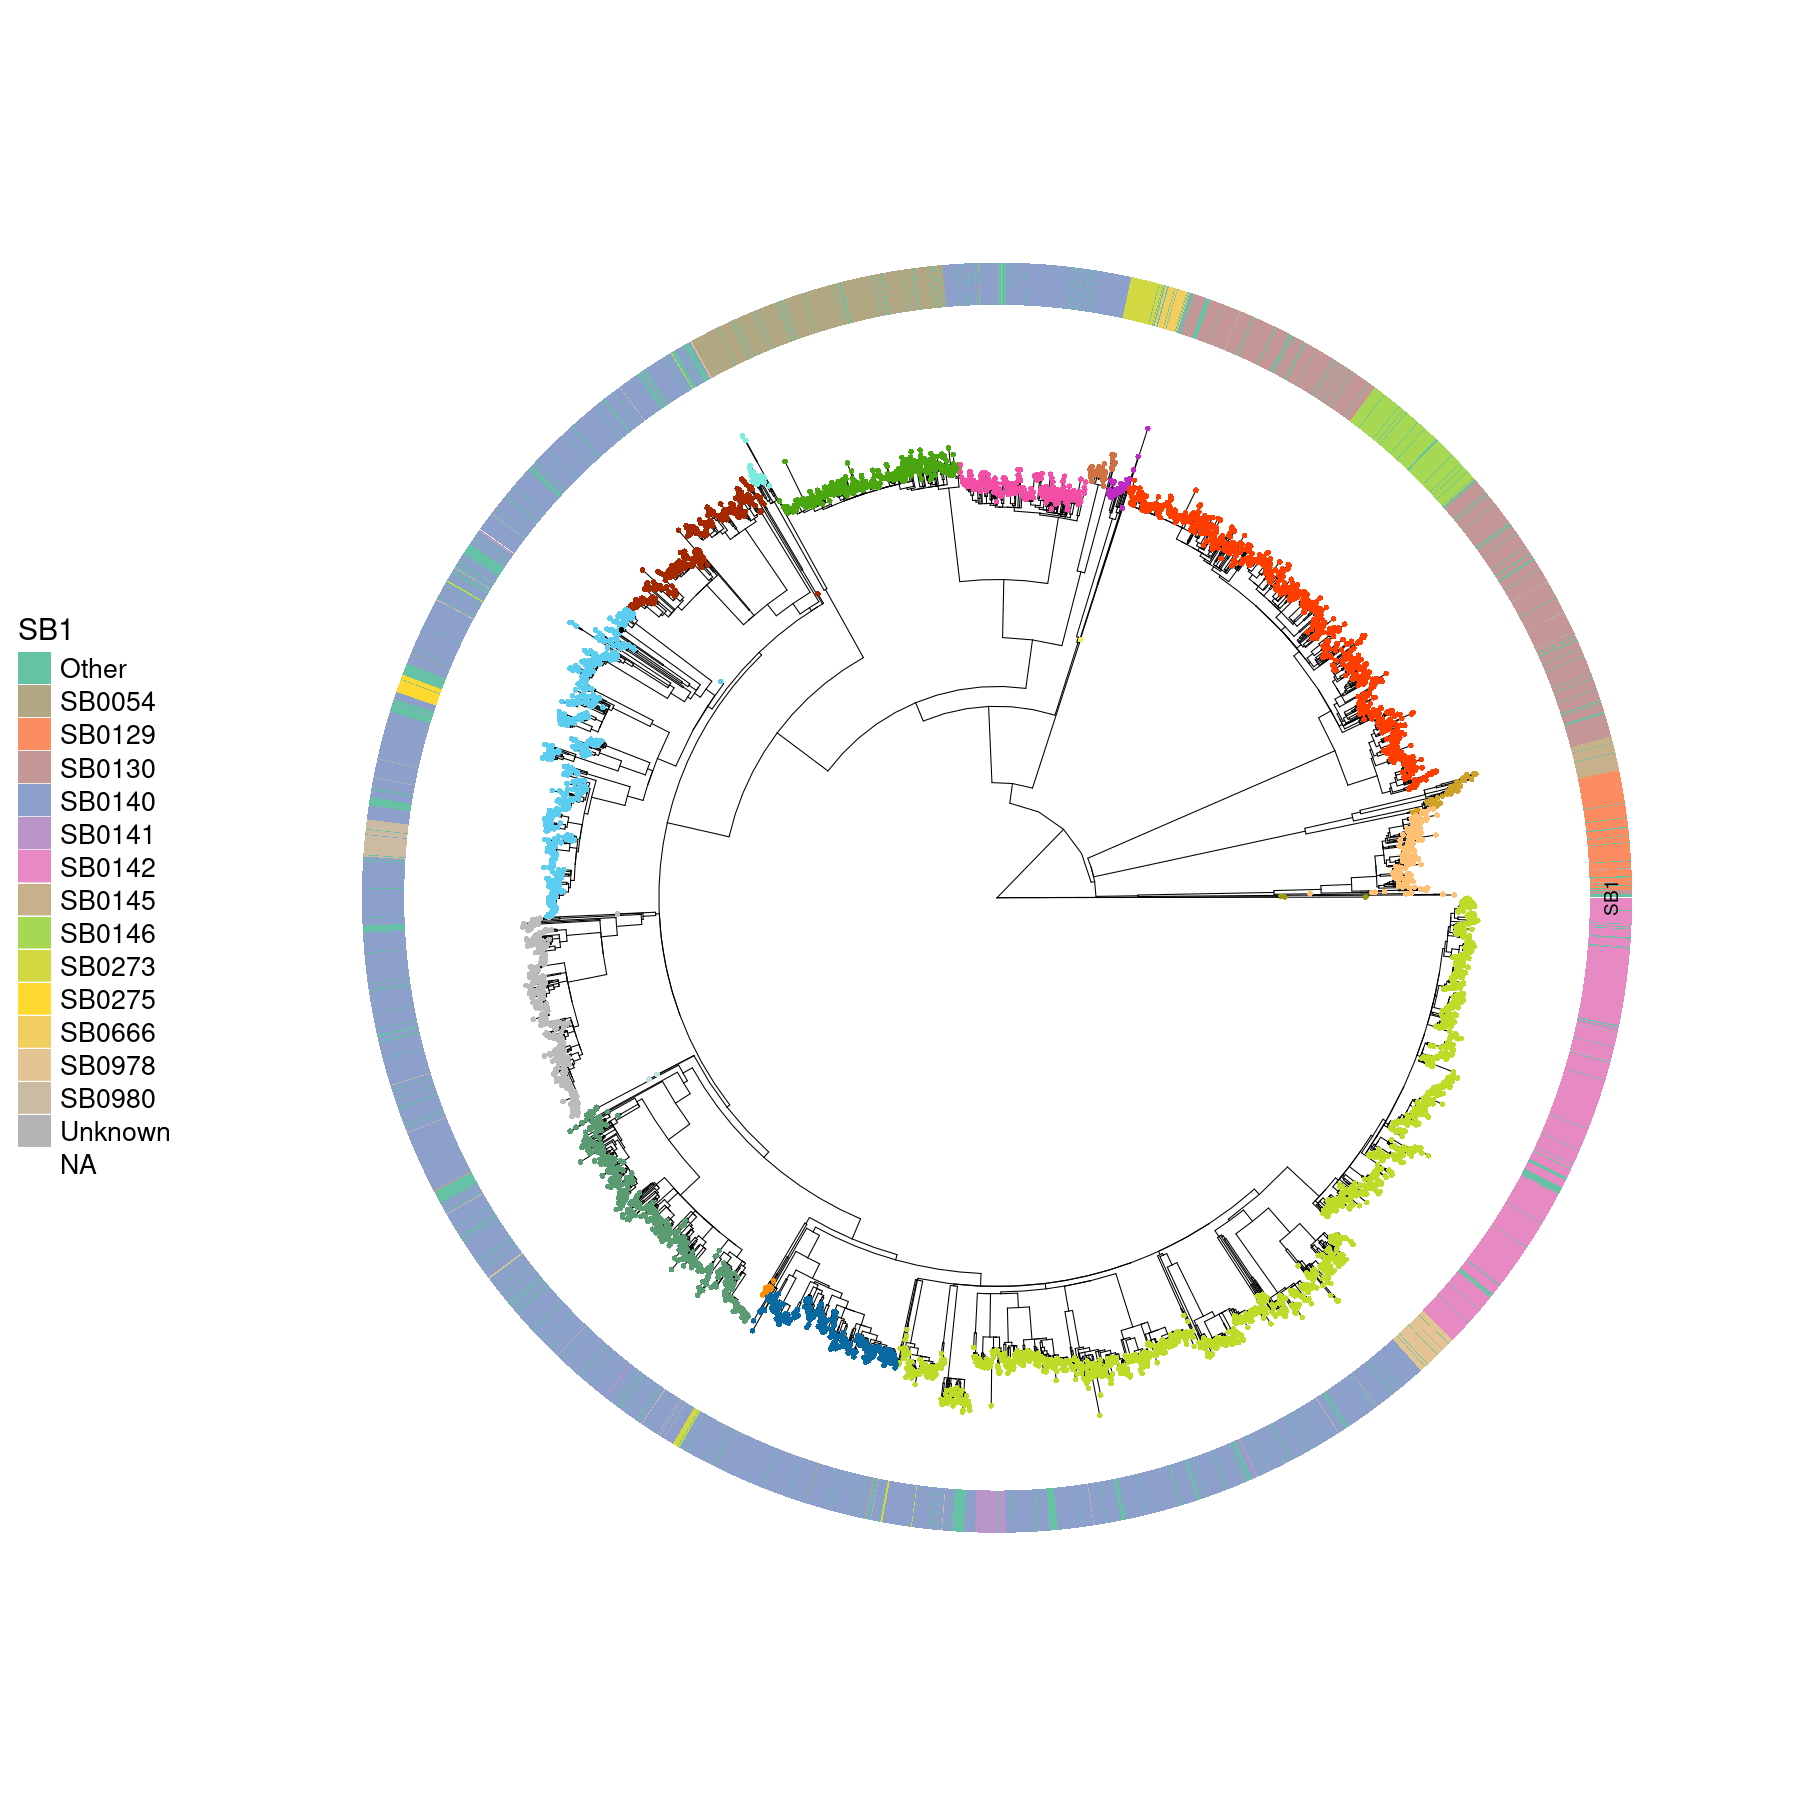

In [10]:
options(repr.plot.width=15, repr.plot.height=15)
p <- ggplottree(rtree, meta, layout='c', cols=c('Level.1','SB1'), cmaps=c('Set1','Set2','Spectral'),
                colors=list(cladecolors),
                legends=c(FALSE,TRUE,FALSE),legend.fontsize=16,
                offset=.0008, tipsize=1.6, 
                size=.3, align=TRUE)

#col<-'short_name'
#plotcladelabels(rtree, meta, 'Level.1', p)
p

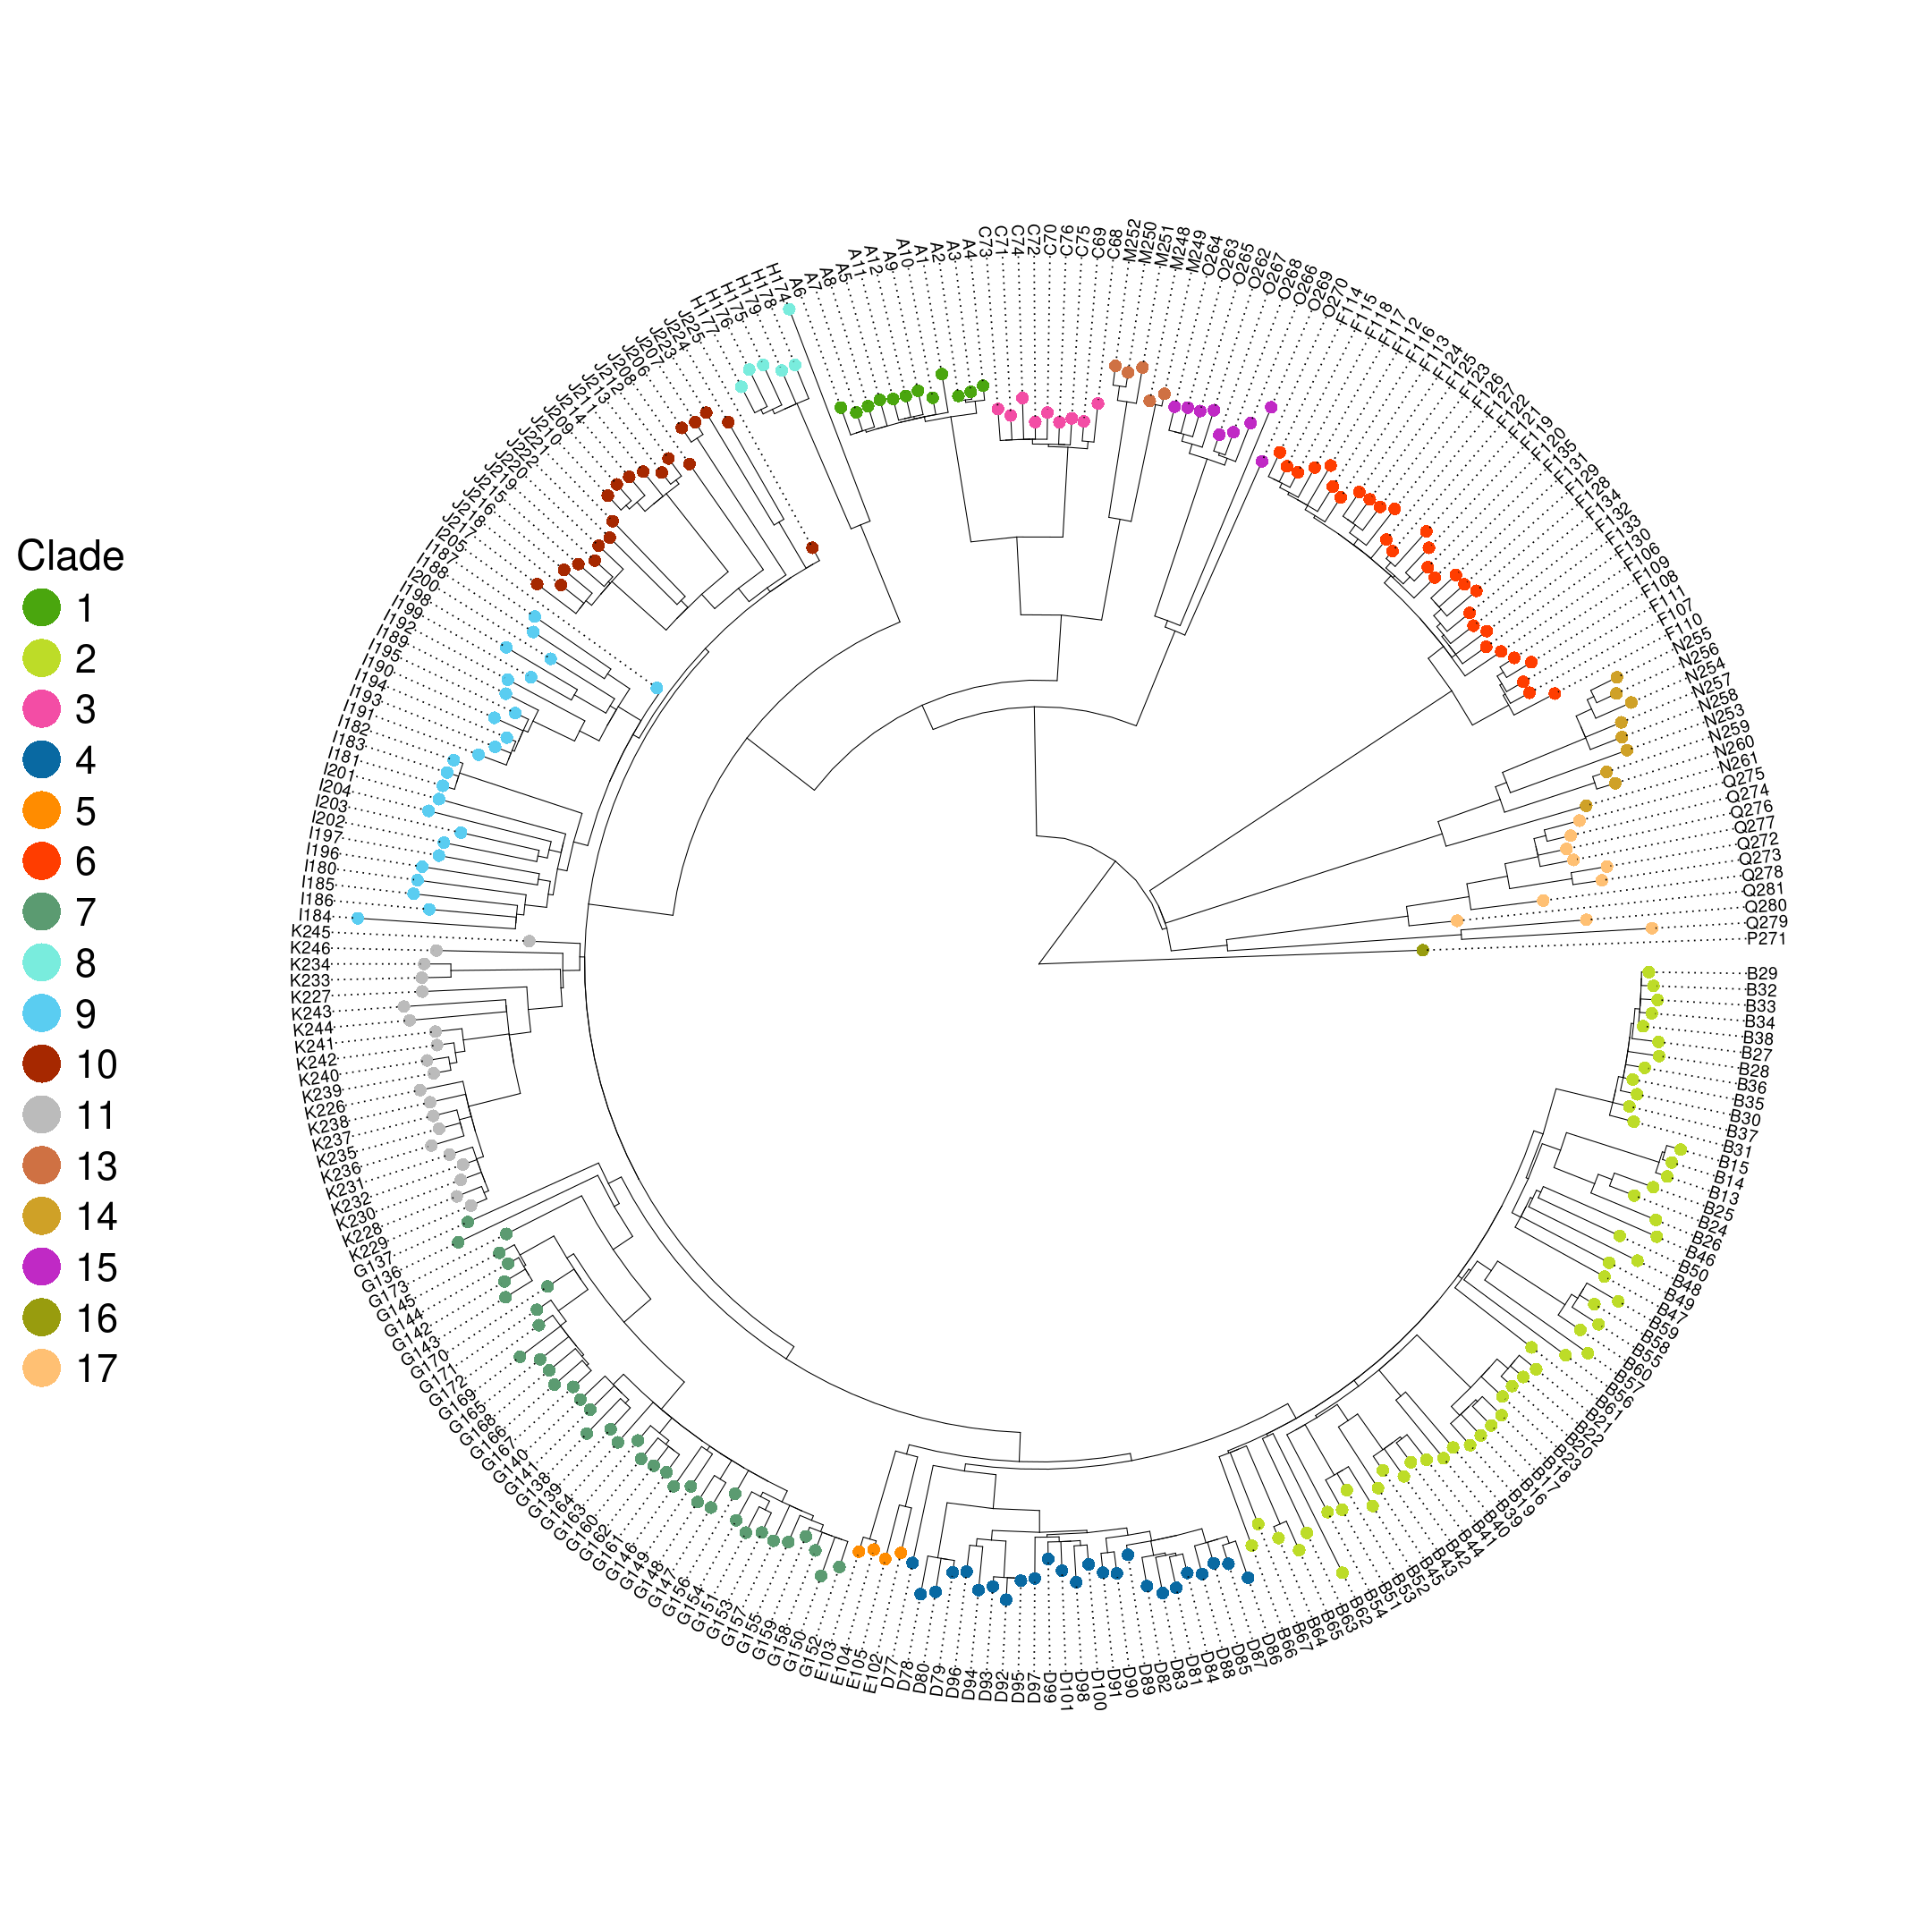

In [23]:
options(repr.plot.width=18, repr.plot.height=18)
#ptree <- prune_tree(tree, 400)
uniq <- row.names(distinct(meta,short_name,.keep_all = TRUE))
keep <- paste(c(uniq))
stree <- keep.tip(rtree, uniq)
#remove <- rownames(meta[meta$clade_size<=1,])
remove <- rownames(meta[meta$Level.1 %in% c('12','18'),])
stree <- drop.tip(stree, remove)
#stree$tip.label
#stree <- midpoint.root(stree)

p <- ggplottree(stree, meta, layout='c', cols=c('Clade'), cmaps=c('Set1','Set1'),
                colors=list(cladecolors),
                legends=c(TRUE),legend.fontsize=26,legend.pointsize=12,
                offset=.0008, tipsize=4, tiplabelsize=4, tiplabel=TRUE, 
            tiplabelcol='short_name', tipoffset=.0001, size=.3, align=TRUE)
p

In [ ]:
ggsave("tree_unrooted.png", width=8, height=6, scale=2, dpi=300, units = "in")

"daylight" method was used as default layout for unrooted tree.

Average angle change [1] 0.0307709913655752



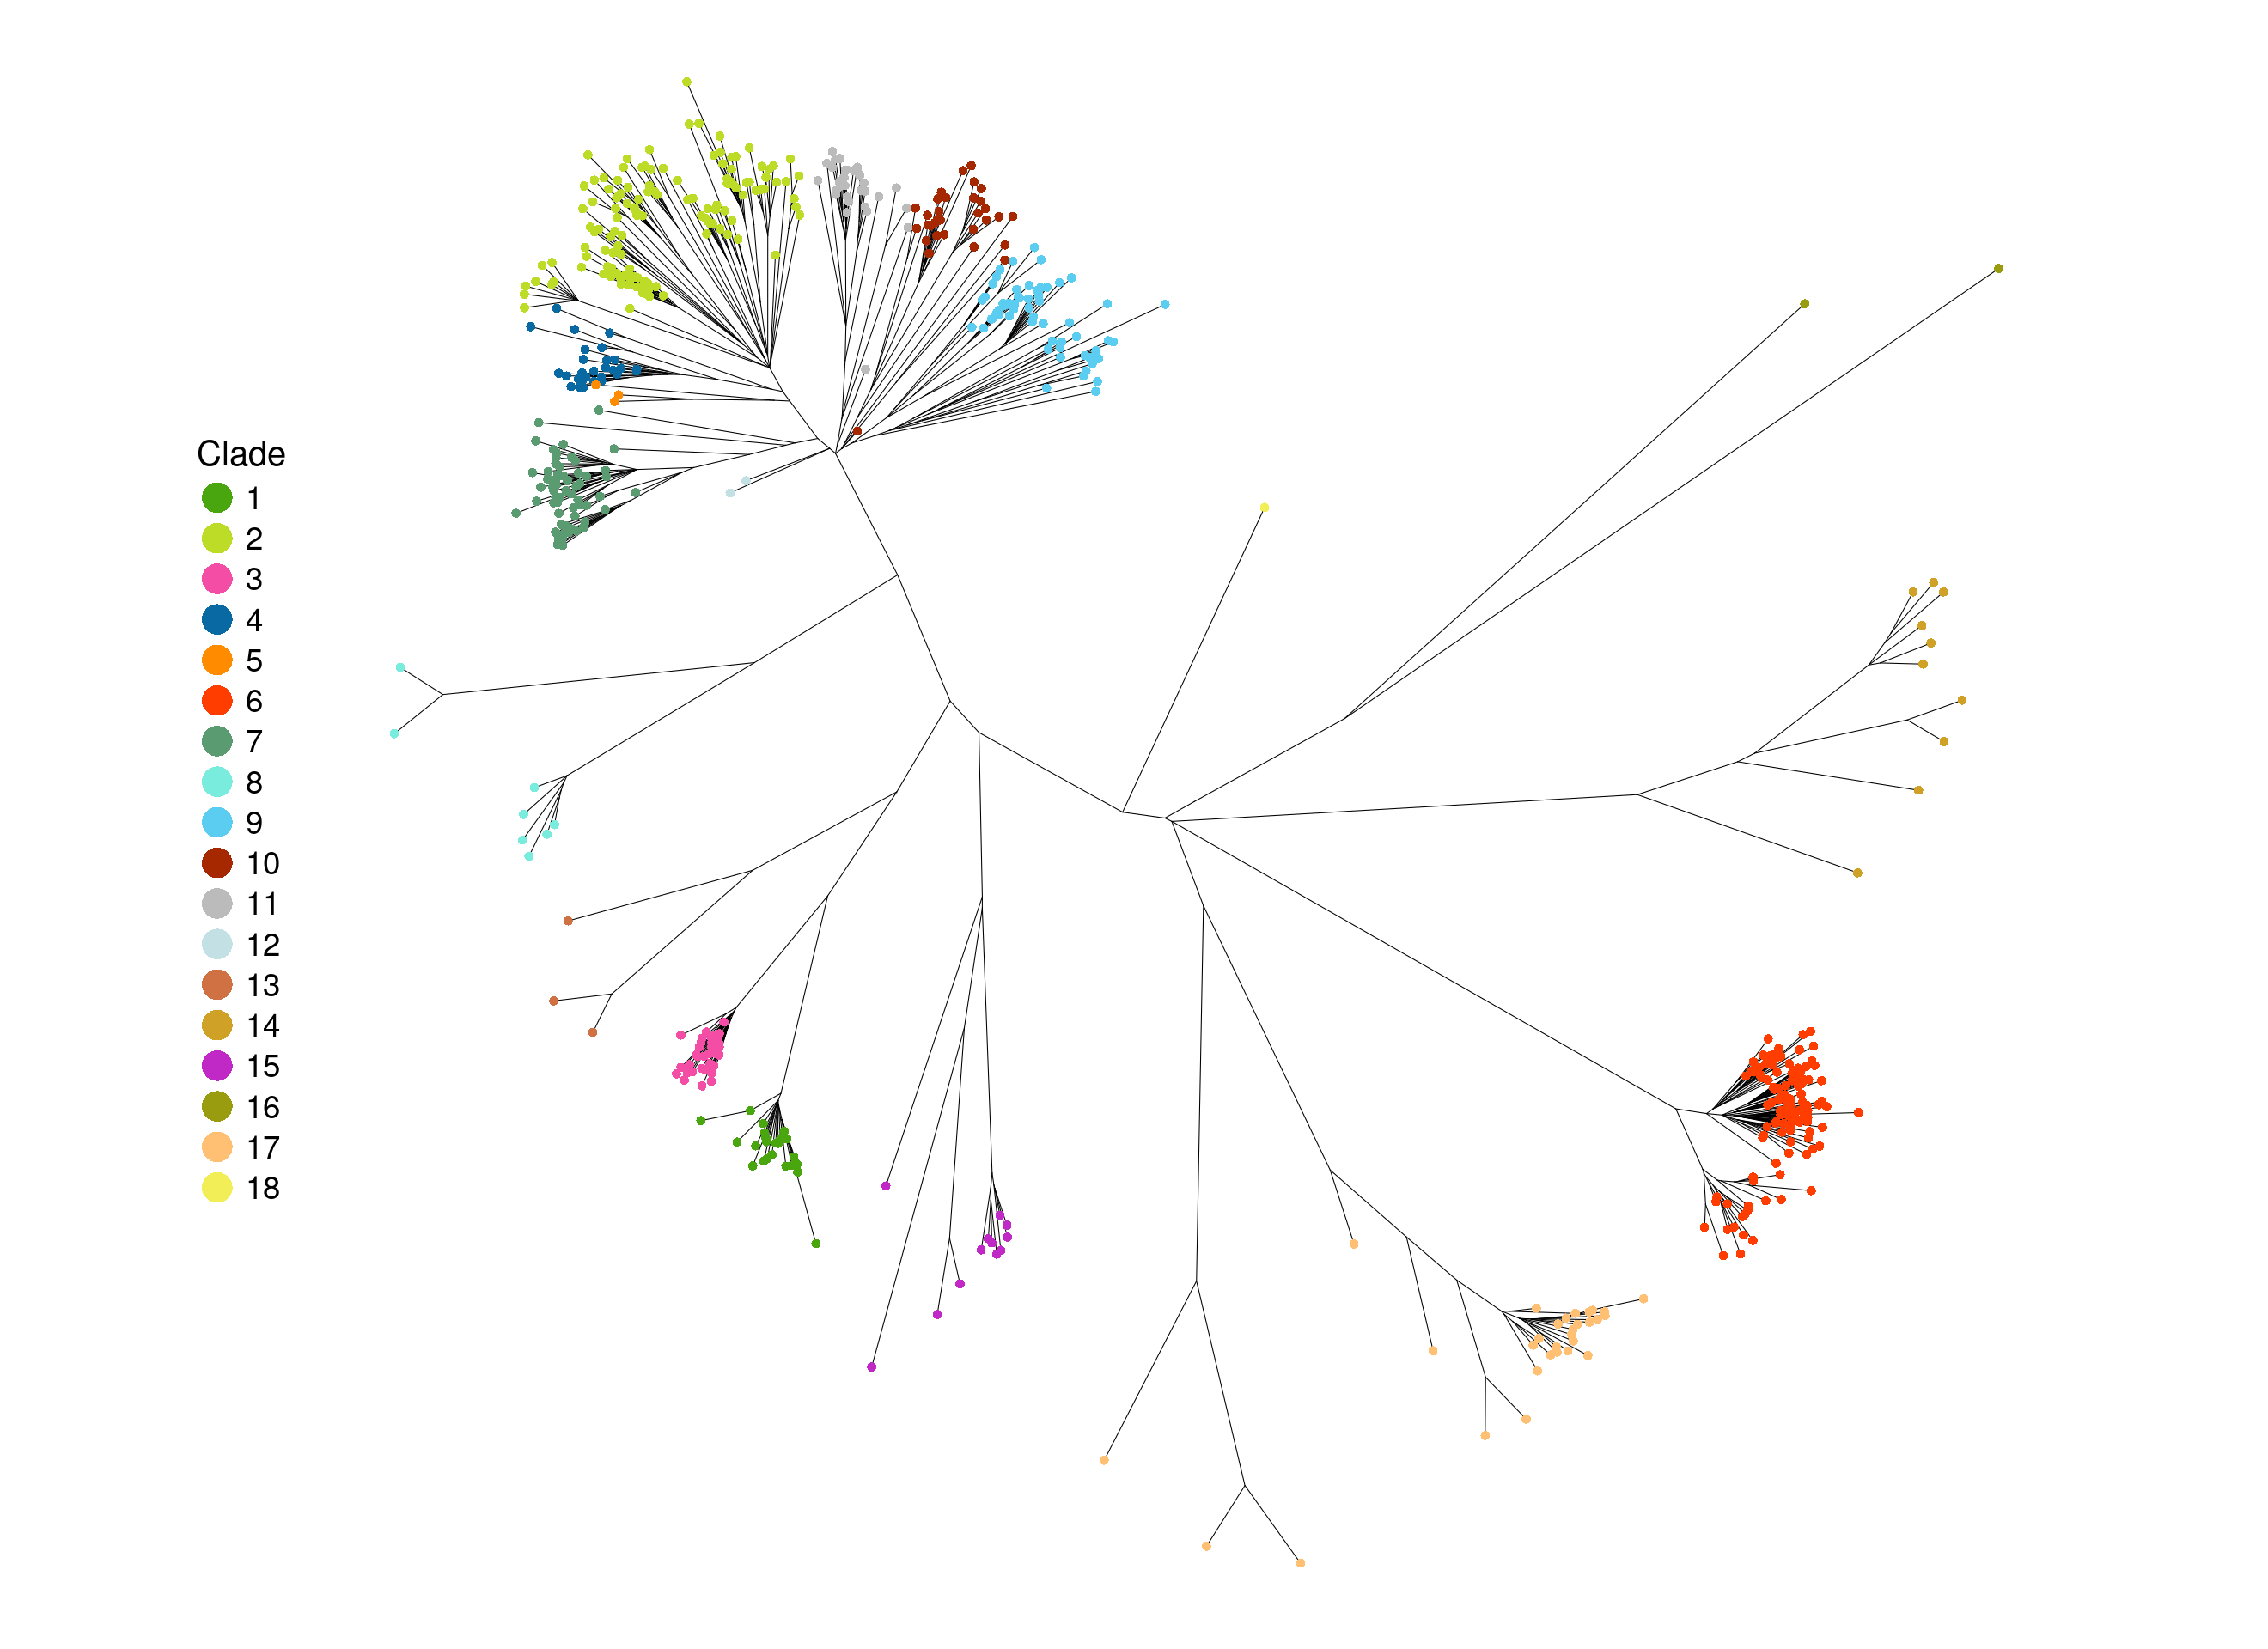

In [16]:
ptree <- prune_tree(tree, 600)
#uniq <- row.names(distinct(meta,Level.2,.keep_all = TRUE))
meta$Clade <- meta$Lineage
options(repr.plot.width=22, repr.plot.height=16) 
pu <- ggplottree(ptree, meta, layout='unrooted', cols=c('Clade'), cmaps=c('Set1','Spectral'), colors=list(cladecolors),
           legends=c(TRUE),legend.pointsize=10, legend.fontsize=22,
           size=.3,tipsize=3, tiplabelsize=4, tipoffset=.5, offset=.01)
pu

In [ ]:
options(repr.plot.width=16, repr.plot.height=11) 
pu <- ggplottree(ptree, meta, layout='unrooted', cols=c('SB1'),cmaps=c('Set1','Spectral'),
           legends=c(TRUE),legend.pointsize=16, legend.fontsize=18,
           size=.3,tipsize=3, tiplabelsize=4, tipoffset=.5, offset=.01)
pu

## outgroup clades

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


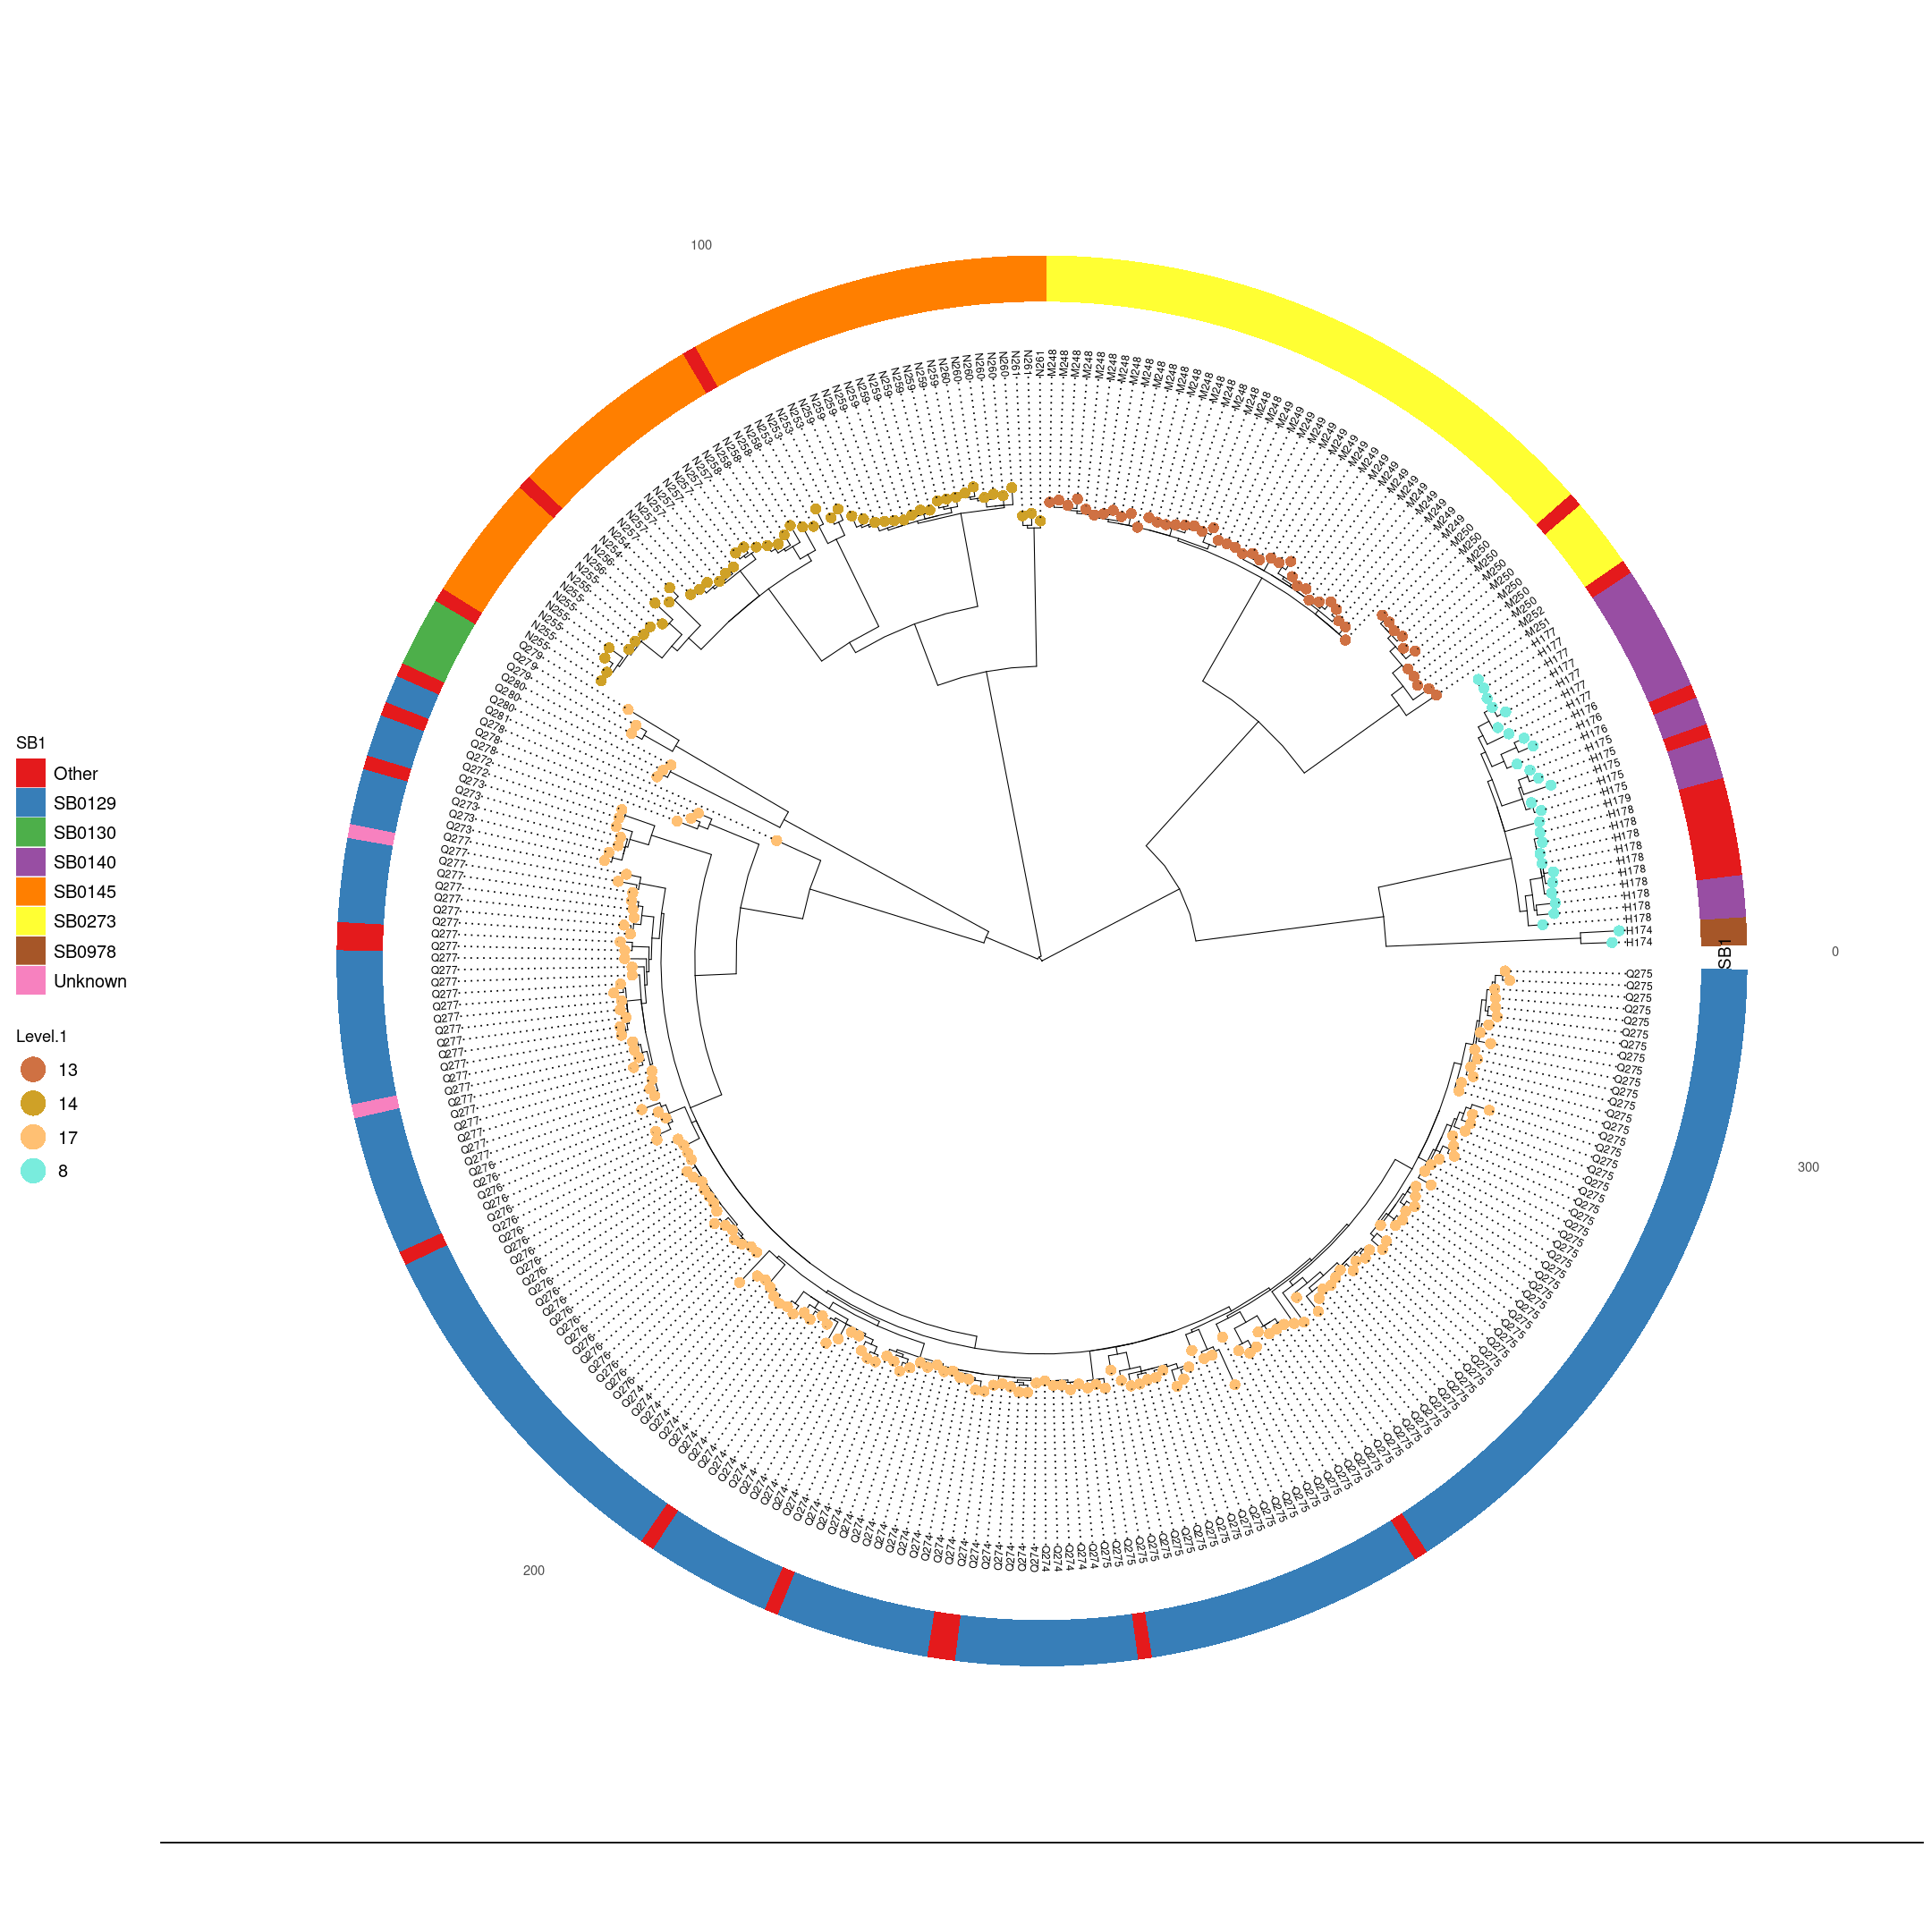

In [394]:
options(repr.plot.width=18, repr.plot.height=18)

cladetips <- rownames(meta[meta$Level.1 %in% c('8','17','14','13'),])
#print (cladetips)
stree <- keep.tip(tree, cladetips)

p <- ggplottree(stree, meta, layout='c', cols=c('Level.1','SB1'), cmaps=c('Set1','Set1','Set2','Blues'),
                colors=list(cladecolors),
                legends=c(TRUE,TRUE),legend.fontsize=12,
           offset=.0008, tipsize=3.5, tiplabelsize=2.5, tiplabel=TRUE, 
            tiplabelcol='short_name', tipoffset=.0001, size=.3, align=TRUE)
p 

## outlier GB samples


Phylogenetic tree with 18 tips and 16 internal nodes.

Tip labels:
  TB20-005616, TB19-000707, TB19-000709, TB21-009661a, TB20-010025, ERR4627370, ...
Node labels:
  100, 100, 80, 100, 86, 95, ...

Unrooted; includes branch lengths.


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


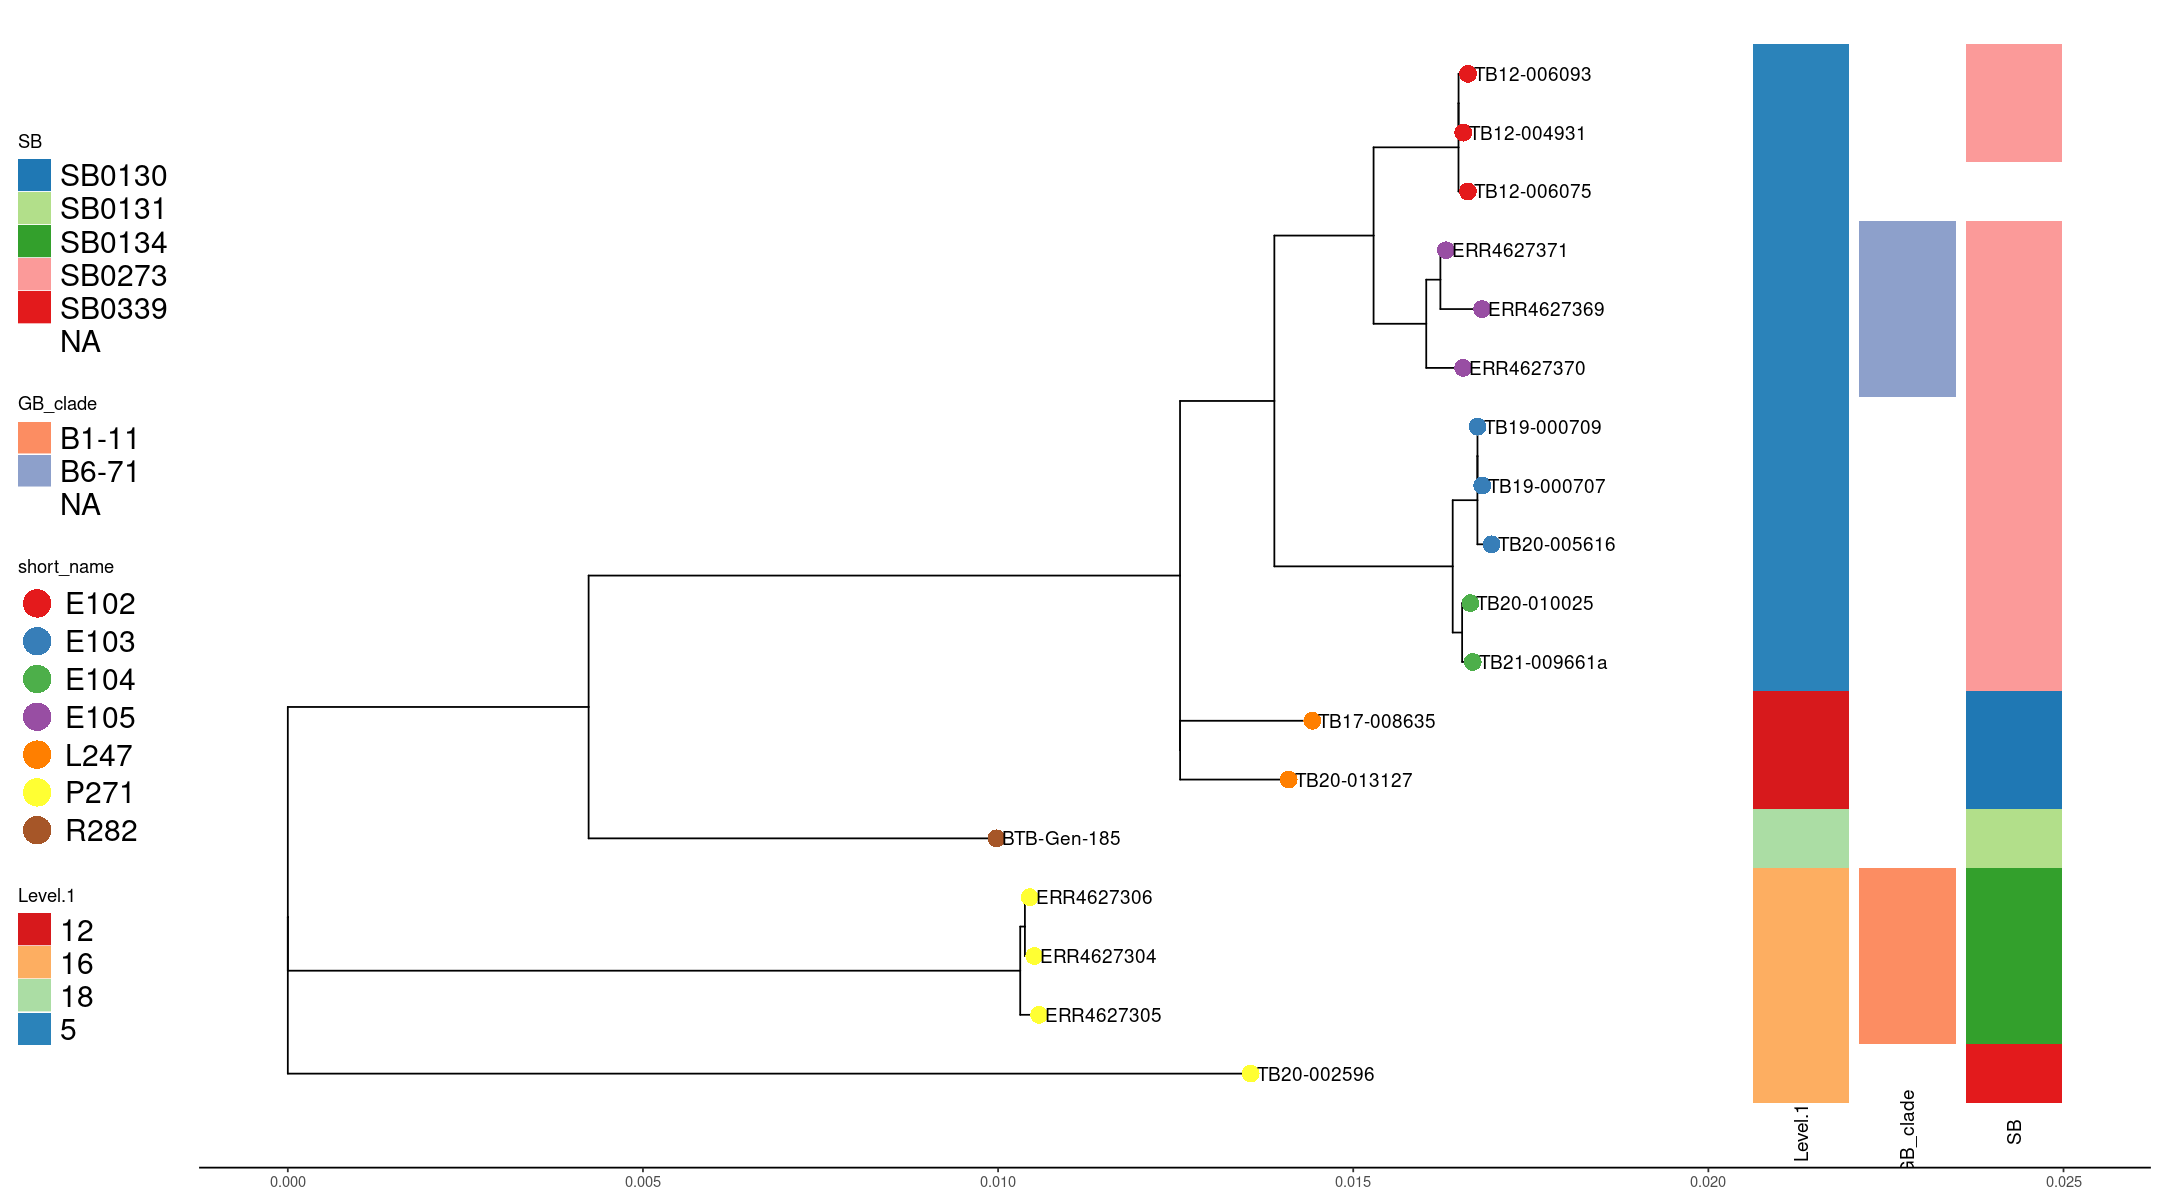

In [417]:
options(repr.plot.width=18, repr.plot.height=10)
cladetips <- rownames(meta[meta$Level.1 %in% c('16','18','12','5'),])
#print (cladetips)
stree <- keep.tip(tree, cladetips)
print (stree)
p<-ggplottree(stree, meta, cols=c('short_name','Level.1','GB_clade','SB'), cmaps=c('Set1','Spectral','Set2','Paired'), size=.5,
           layout='rect', offset=.0015, tipsize=5, tiplabelsize=4, tiplabel=TRUE)
p + guides(color = guide_legend(override.aes = list(size = 2))) 

## GB samples

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


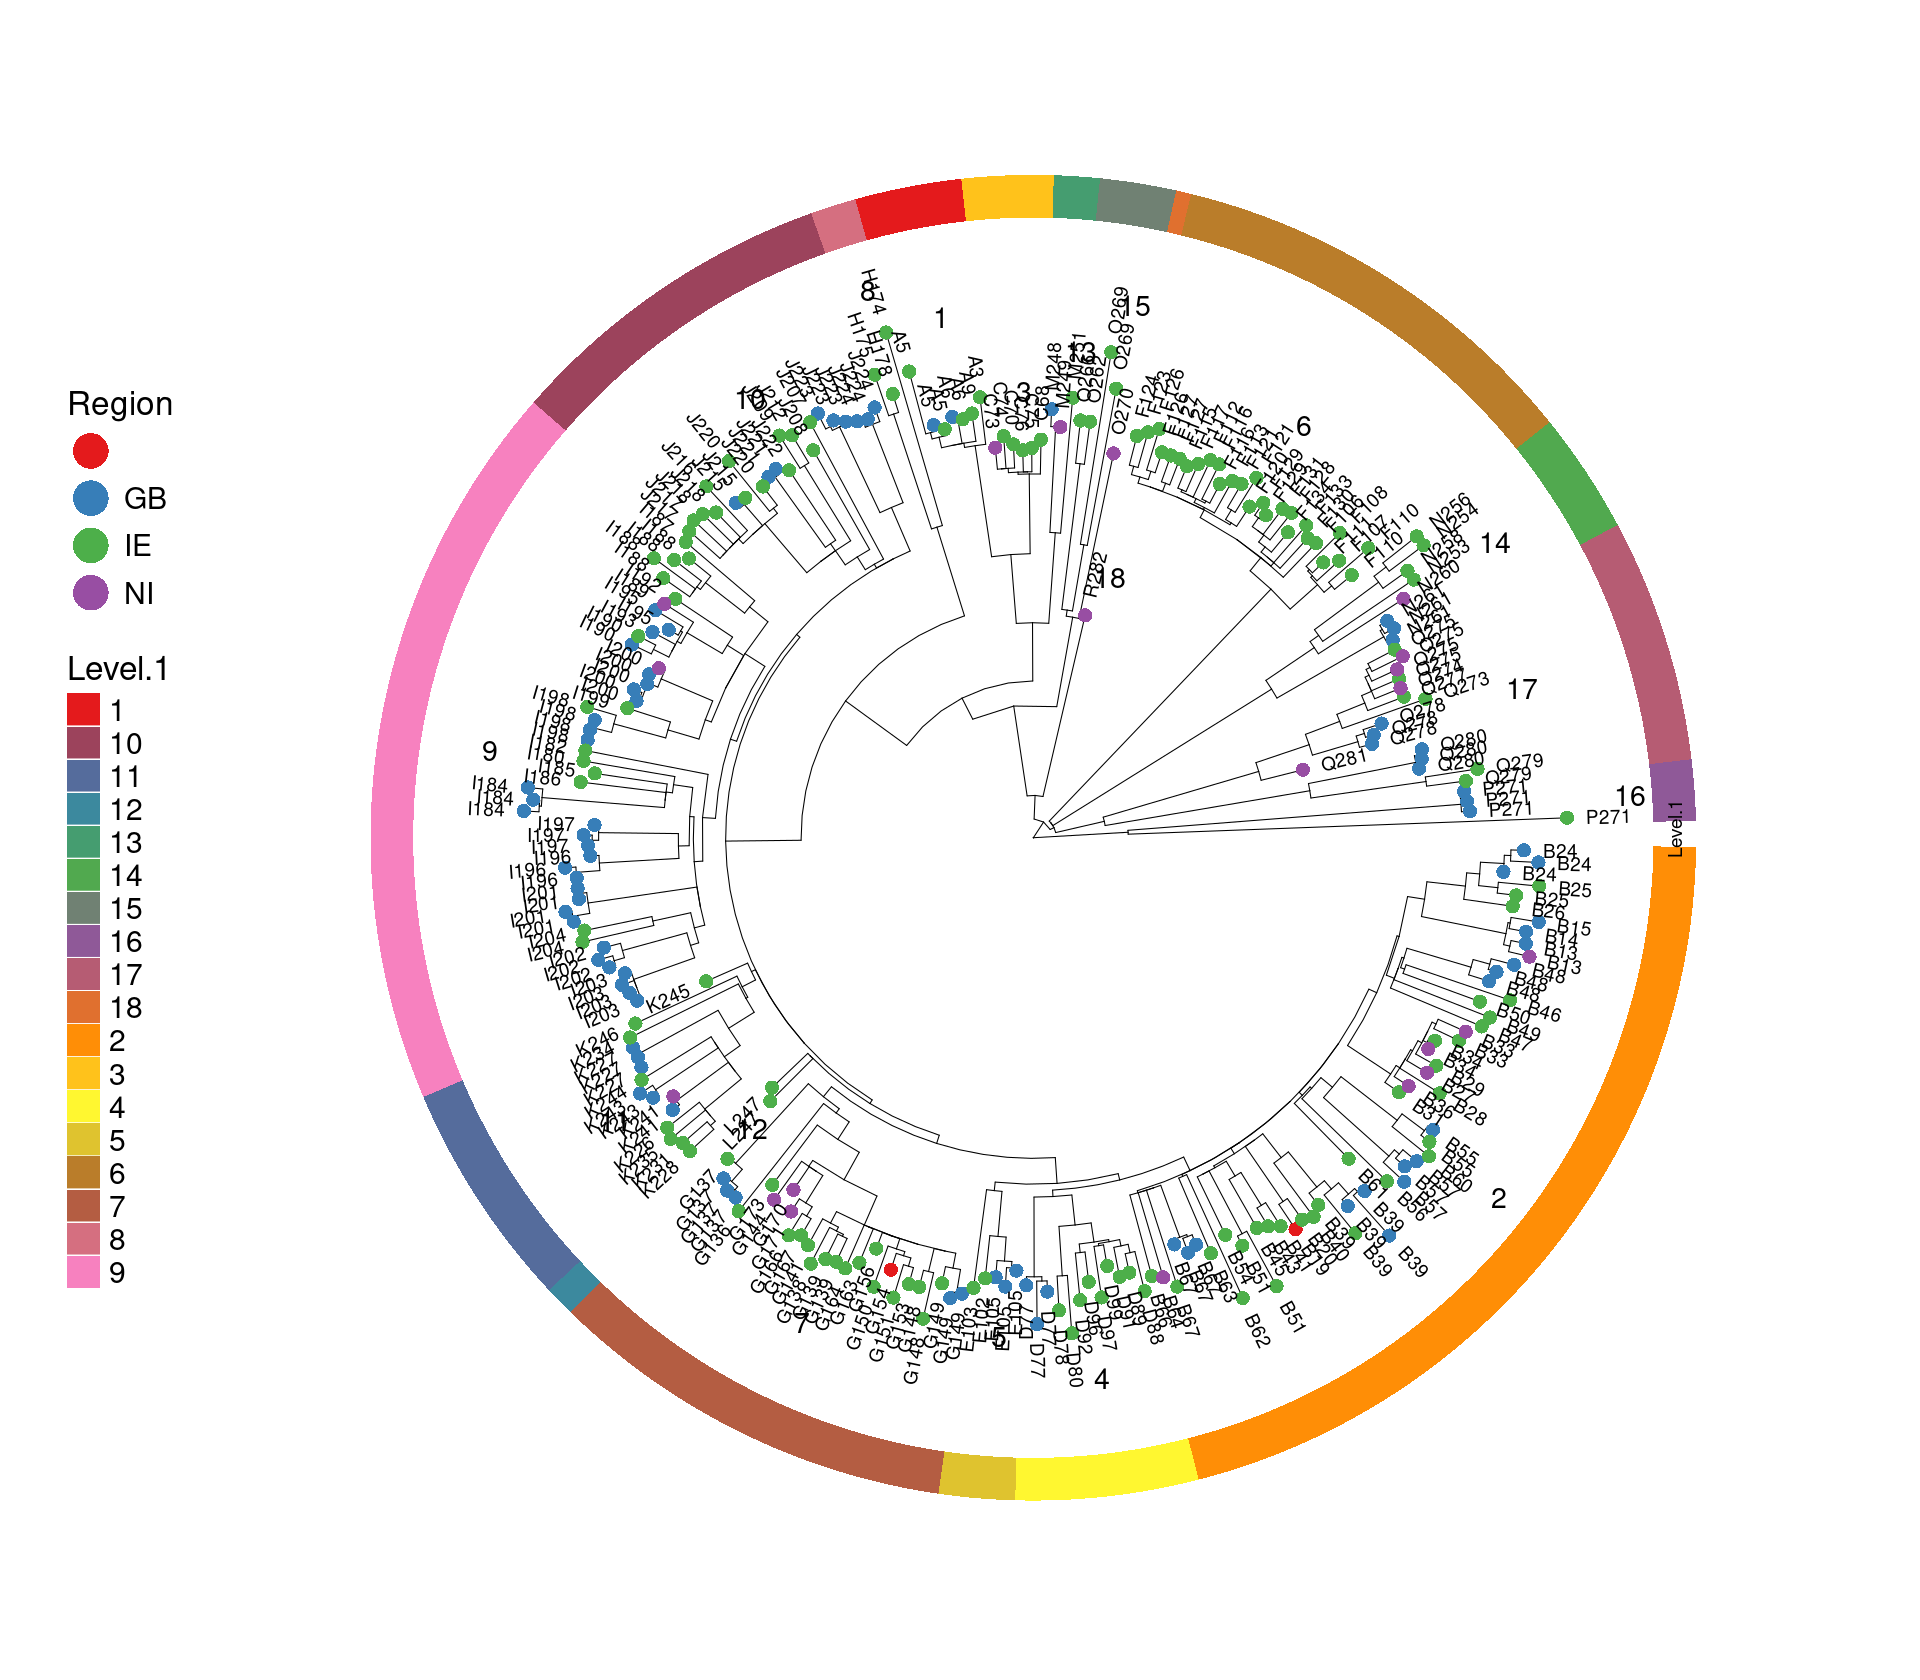

In [83]:
ptree <- prune_tree(tree, 200)
gb <- row.names(meta[meta$Region=='GB',])
tips <- c(gb,ptree$tip.label)
ptree <- keep.tip(tree, tips)
p<-ggplottree(ptree, meta, layout='c', cols=c('Region','Level.1'),cmaps=c('Set1','Set1'),
           legends=c(TRUE,TRUE),legend.pointsize=10, legend.fontsize=18,
           size=.3,tipsize=4, tiplabelsize=4, tipoffset=.0005, tiplabel=TRUE, tiplabelcol='short_name',offset=.001)

plotcladelabels(ptree, meta, 'Level.1',p)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


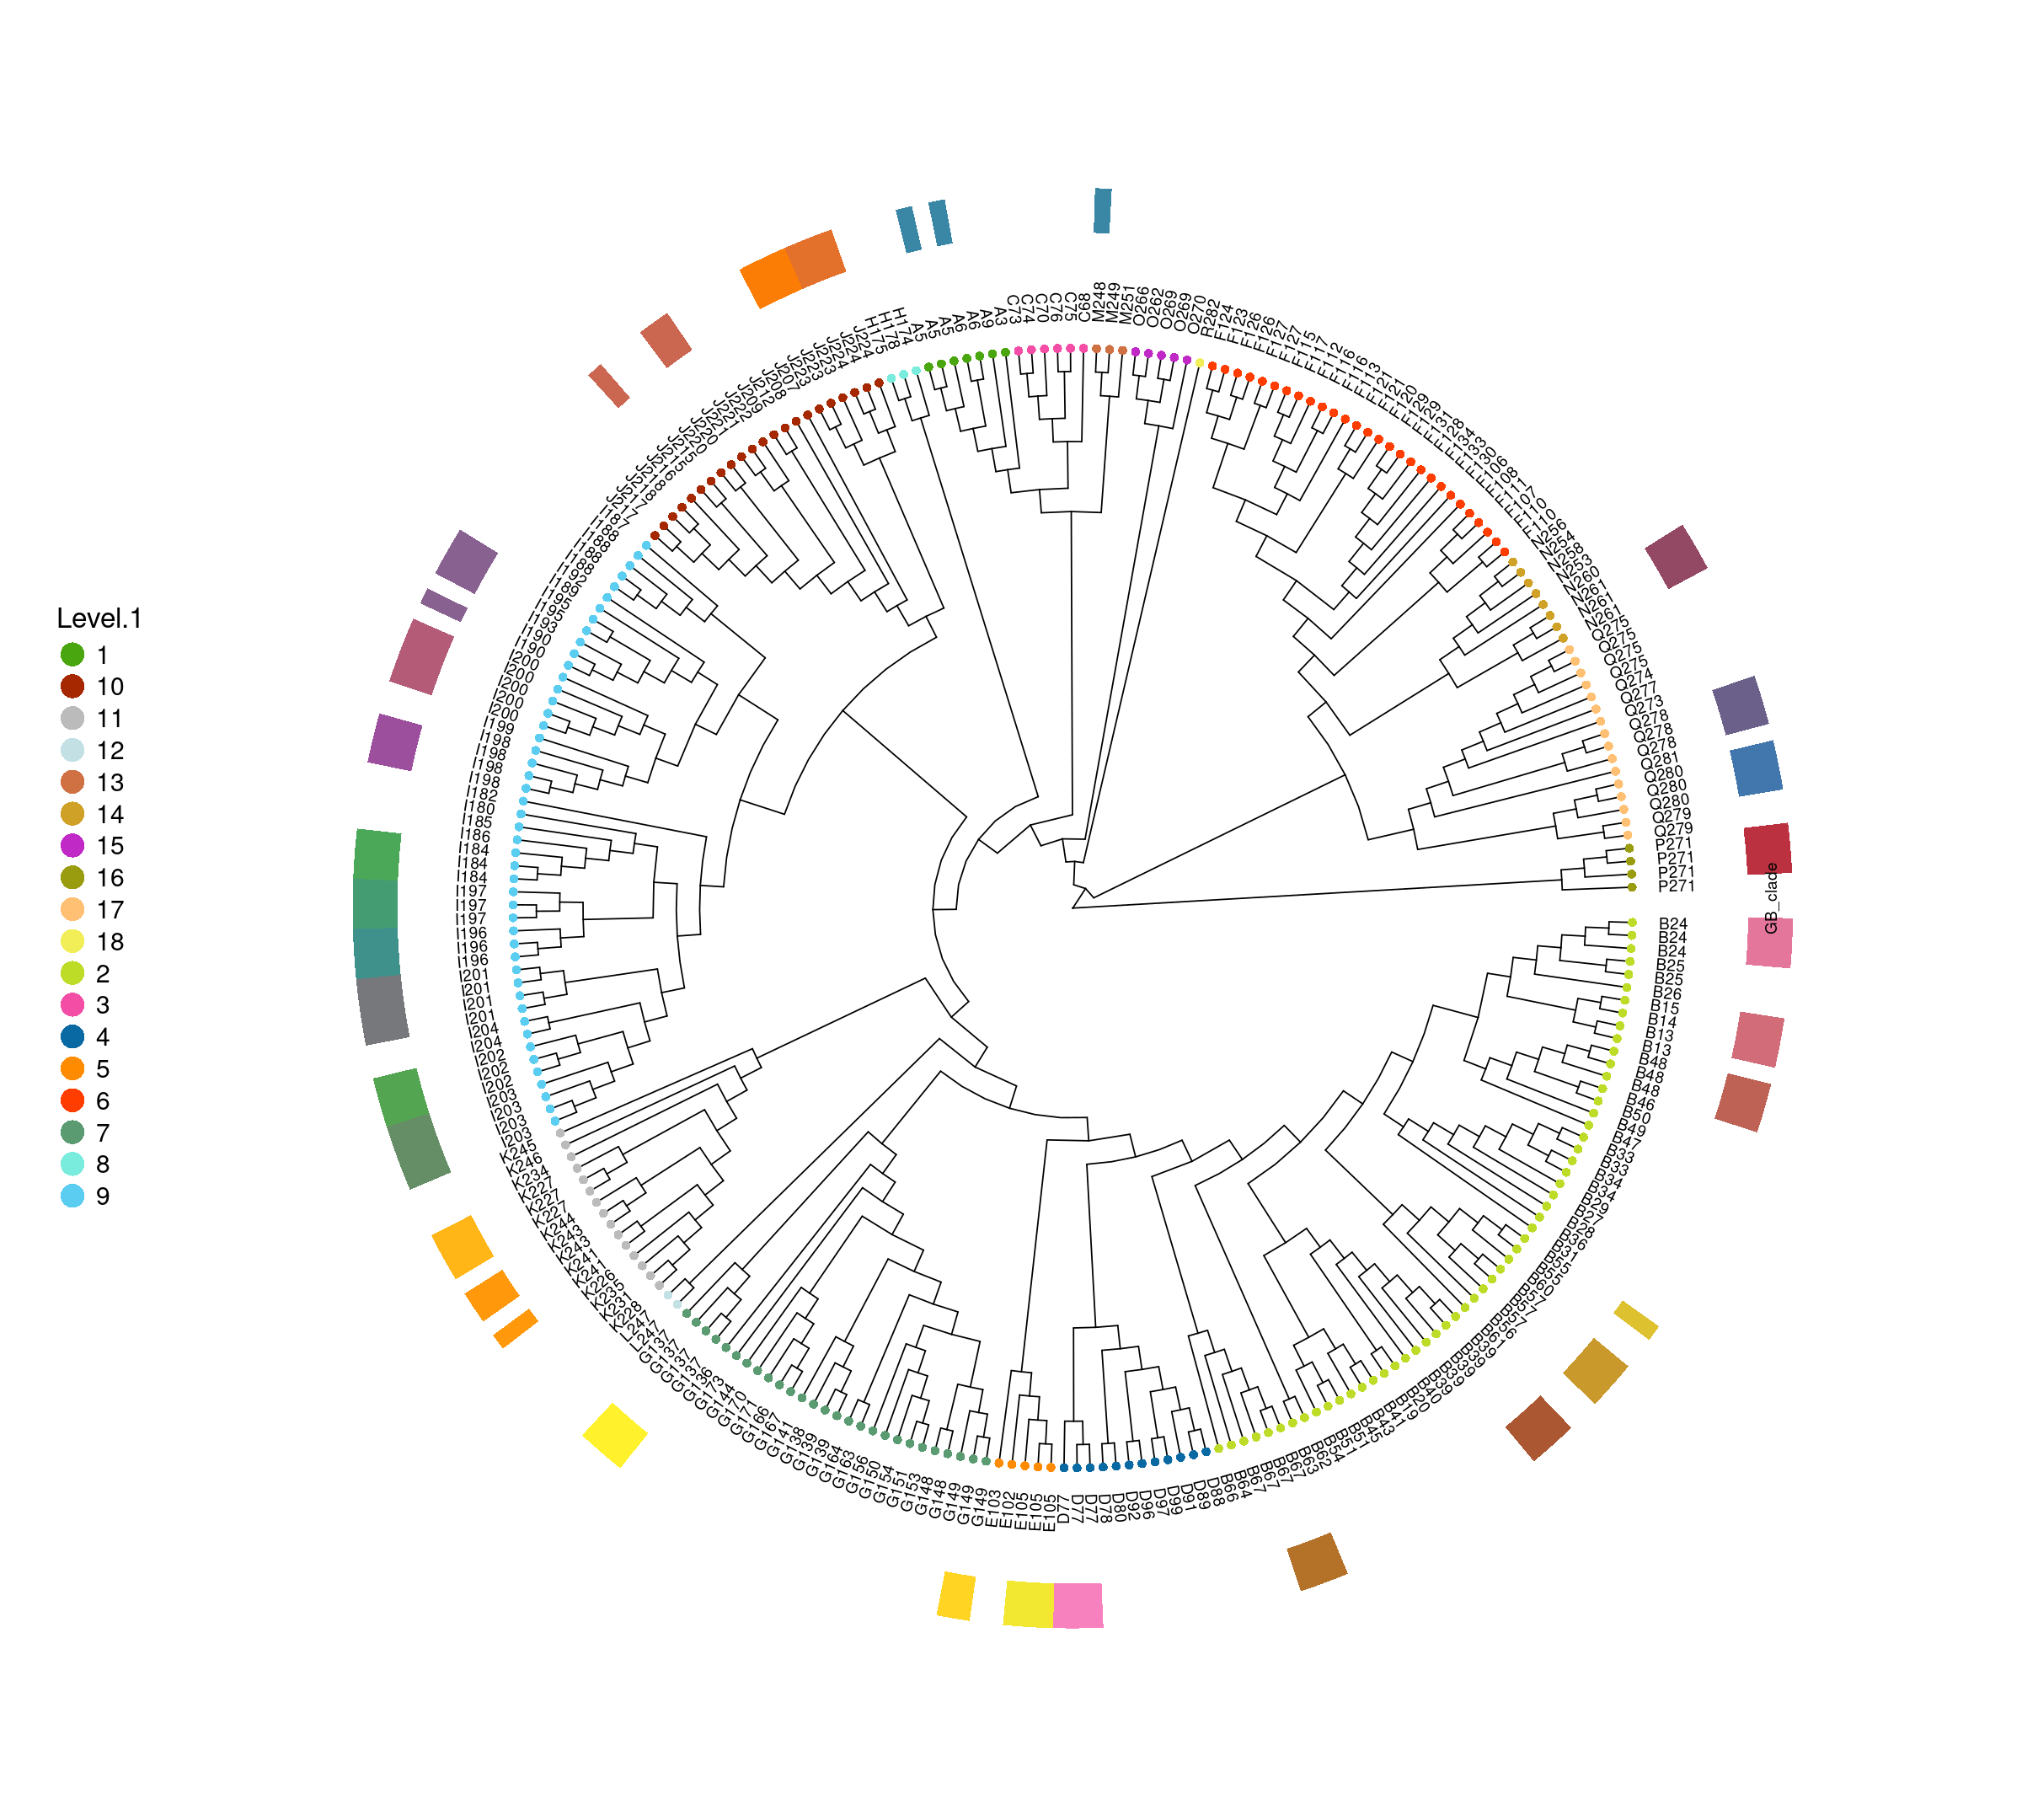

In [84]:
options(repr.plot.width=20, repr.plot.height=18)
#ptree <- prune_tree(tree, 150)
ggplottree(ptree, meta, layout='cladogram', cols=c('Level.1','GB_clade'),cmaps=c('Set2','Set1'),colors=list(cladecolors),
           tipsize=3, offset=2, tiplabel=TRUE, tiplabelcol='short_name',tiplabelsize=4, tipoffset=1, legends=c(TRUE,FALSE))

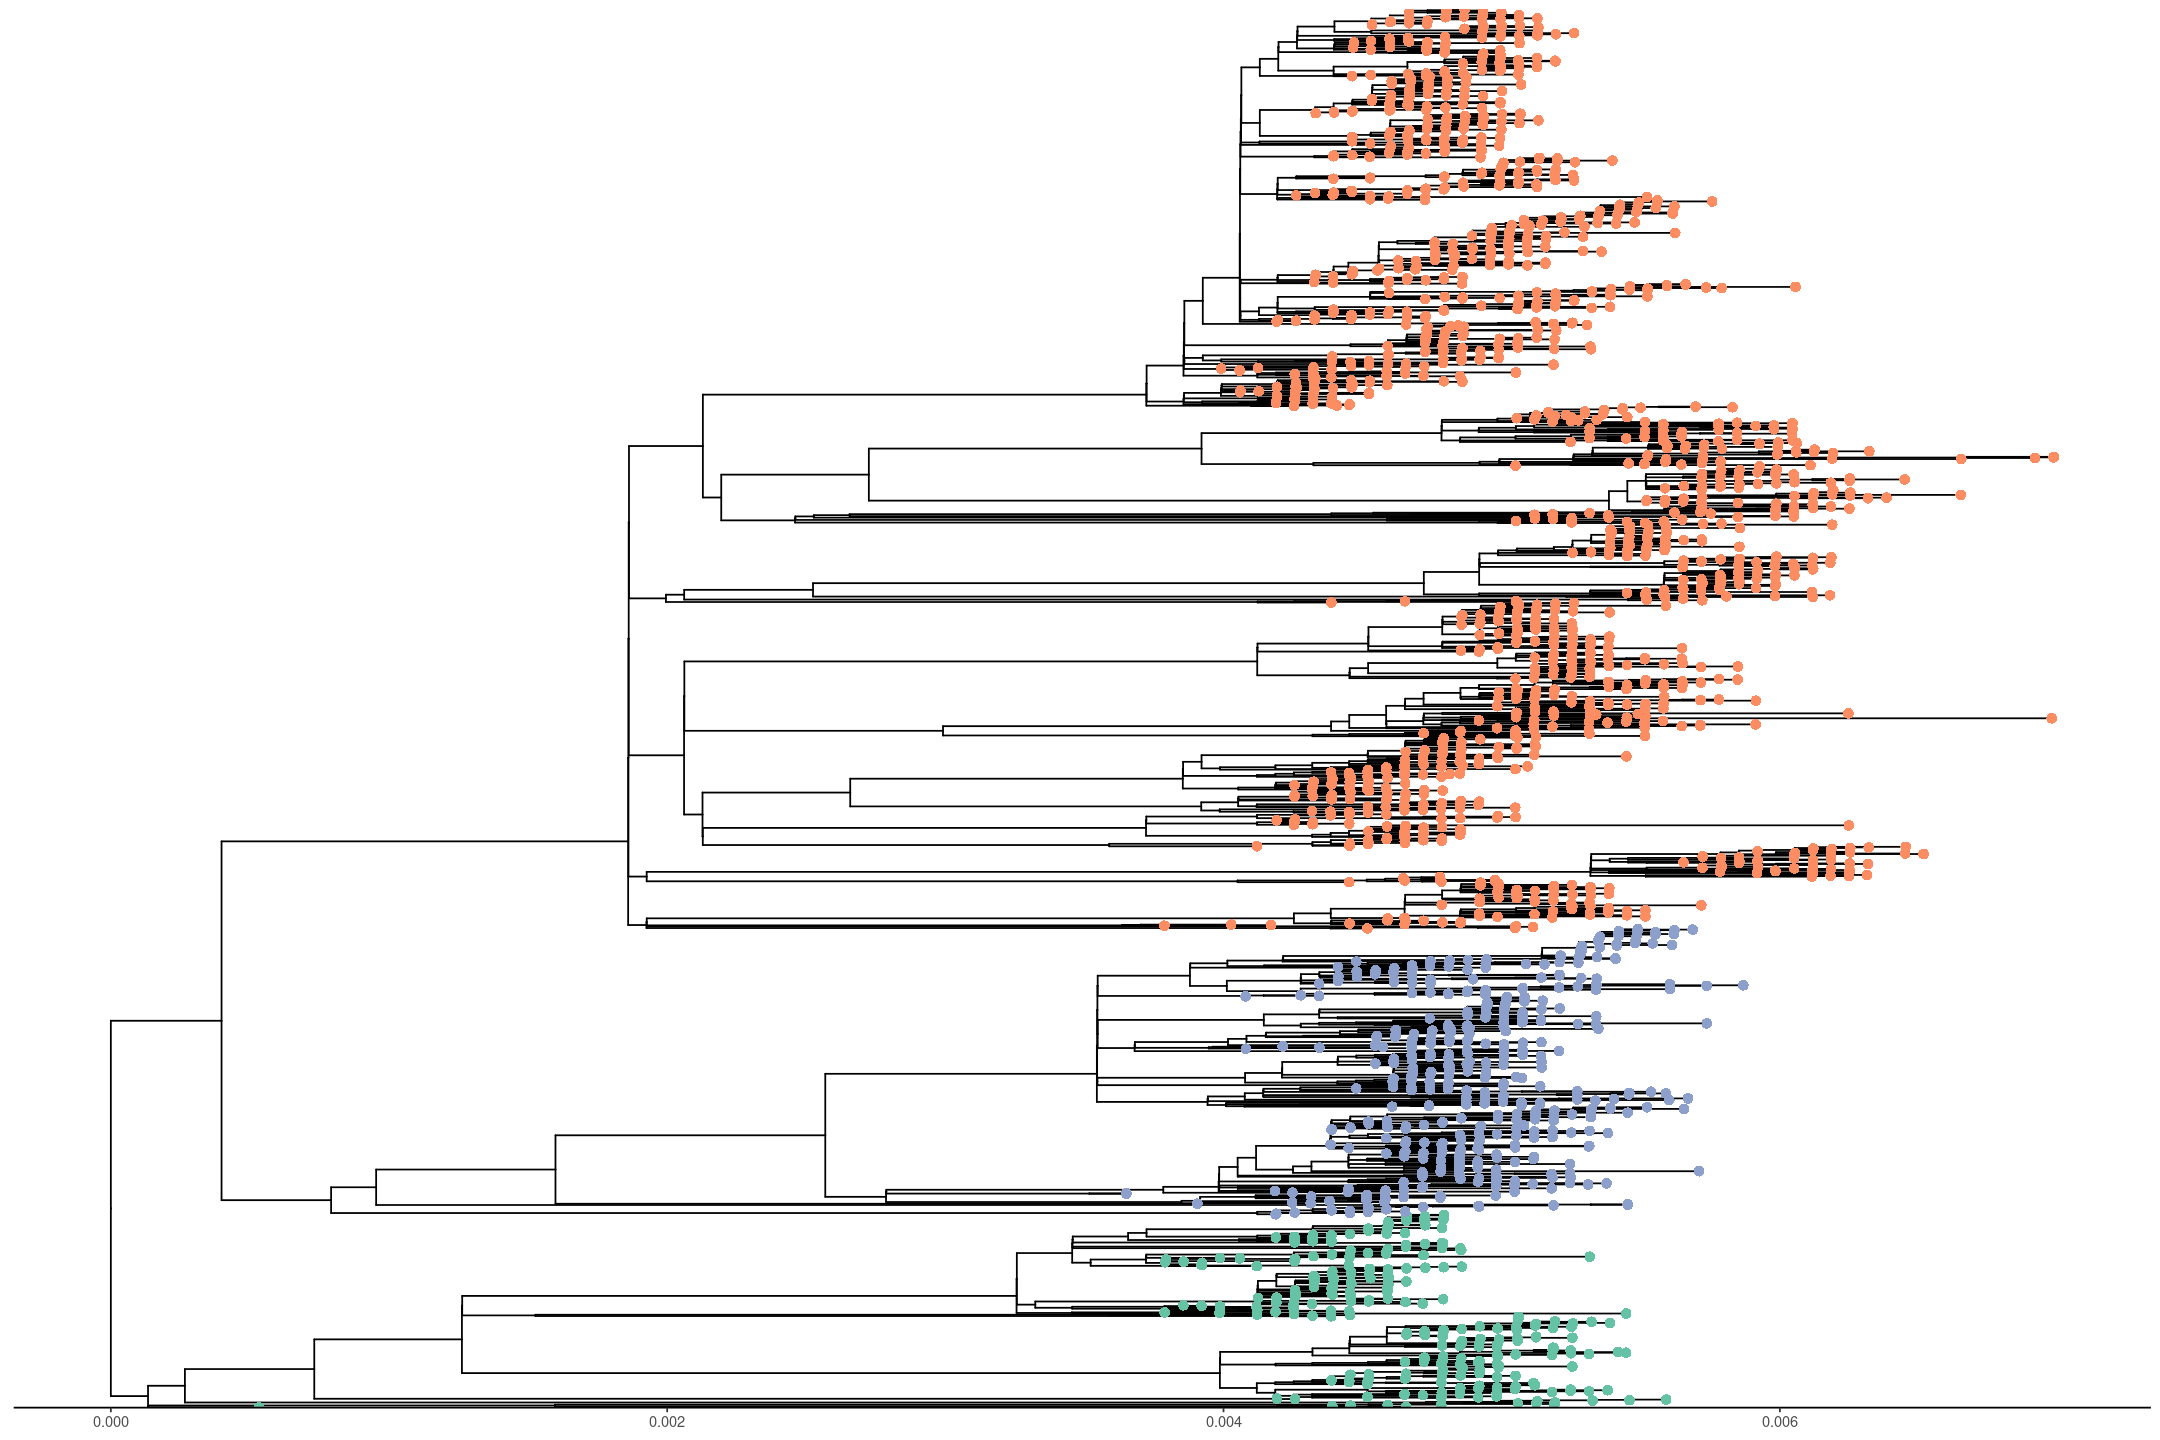

In [412]:
options(repr.plot.width=18, repr.plot.height=12)
tips <- rownames(meta[meta$Level.1 %in% c('2','10','7'),])
stree<-keep.tip(tree,tips)
ggplottree(stree, meta, cols=c('Level.1'), cmaps=c('Set2','Accent'), legends=c(FALSE,TRUE), offset=8)

In [ ]:
options(repr.plot.width=16, repr.plot.height=9)
randtips<-sample(tree$tip.label,200)
randtree<-keep.tip(tree,randtips)
ggplottree(randtree,master,cols=c('snp200'),layout='unrooted',cmaps=c('Set2'))

## representative samples for sharing

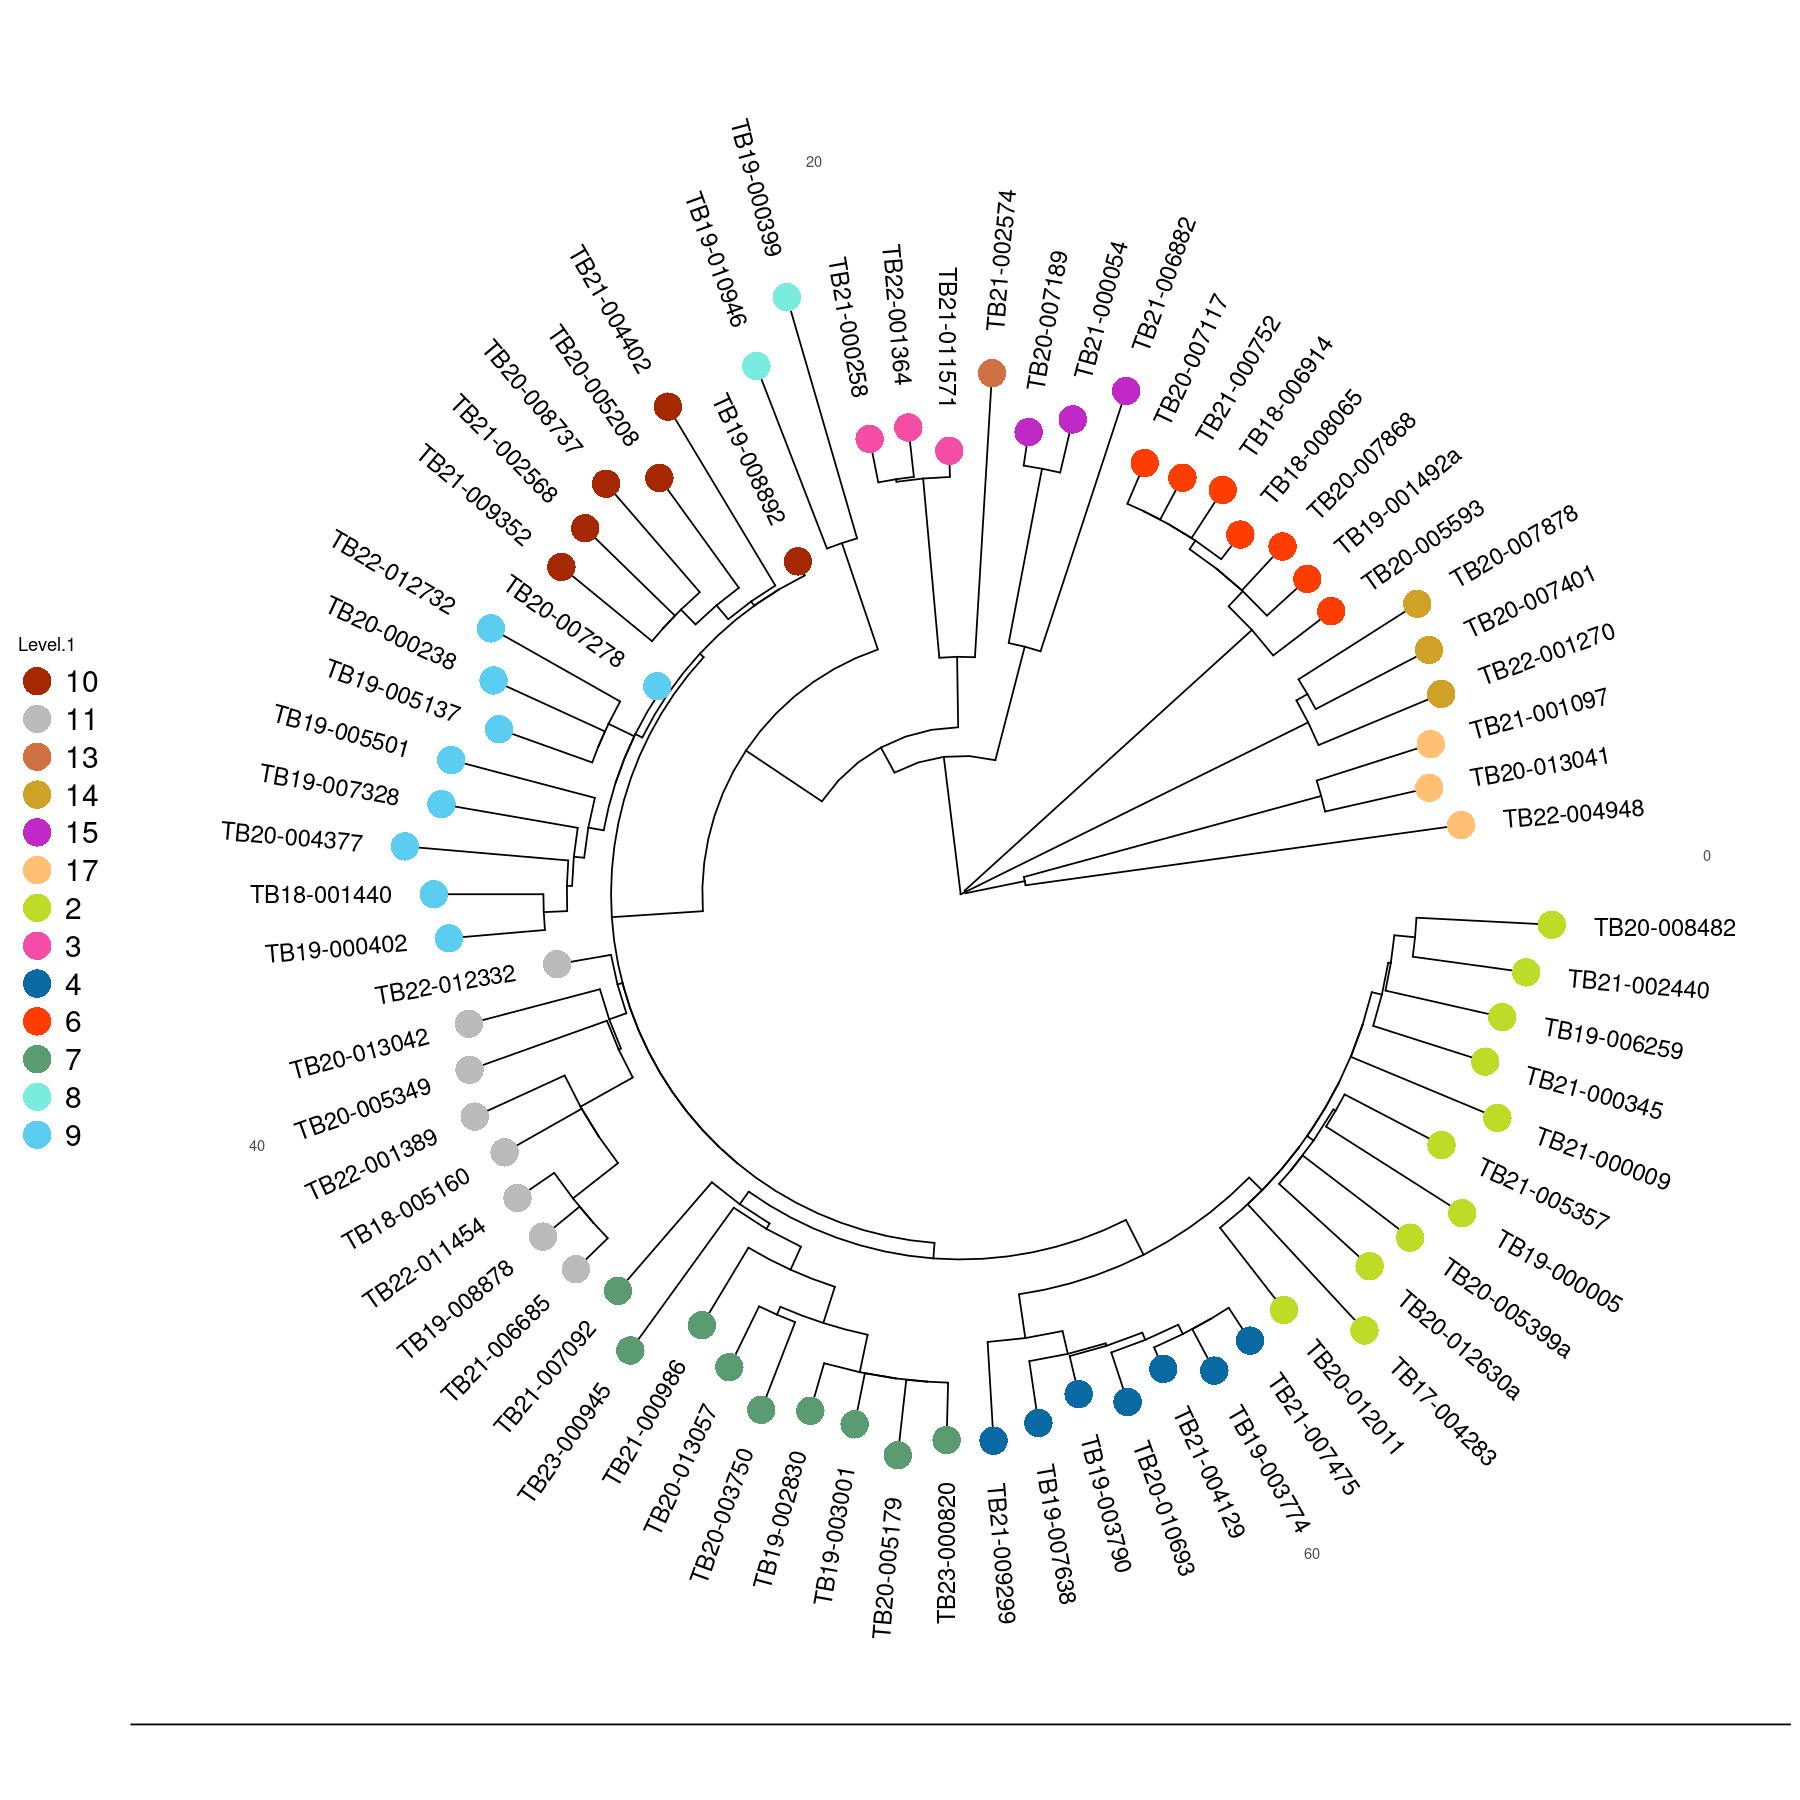

In [343]:
repr <- read.table('../ireland_samples_representative.csv',sep=',',header=TRUE,row.names=1)
tips<-row.names(repr)
rstree<-keep.tip(tree,tips)
ggplottree(rstree, meta, layout='c', cols=c('Level.1'), cmaps=c('Paired'),colors=list(cladecolors),
           tipsize=8,tiplabel=TRUE,tipoffset=.001)

## figure 6 monaghan clusters

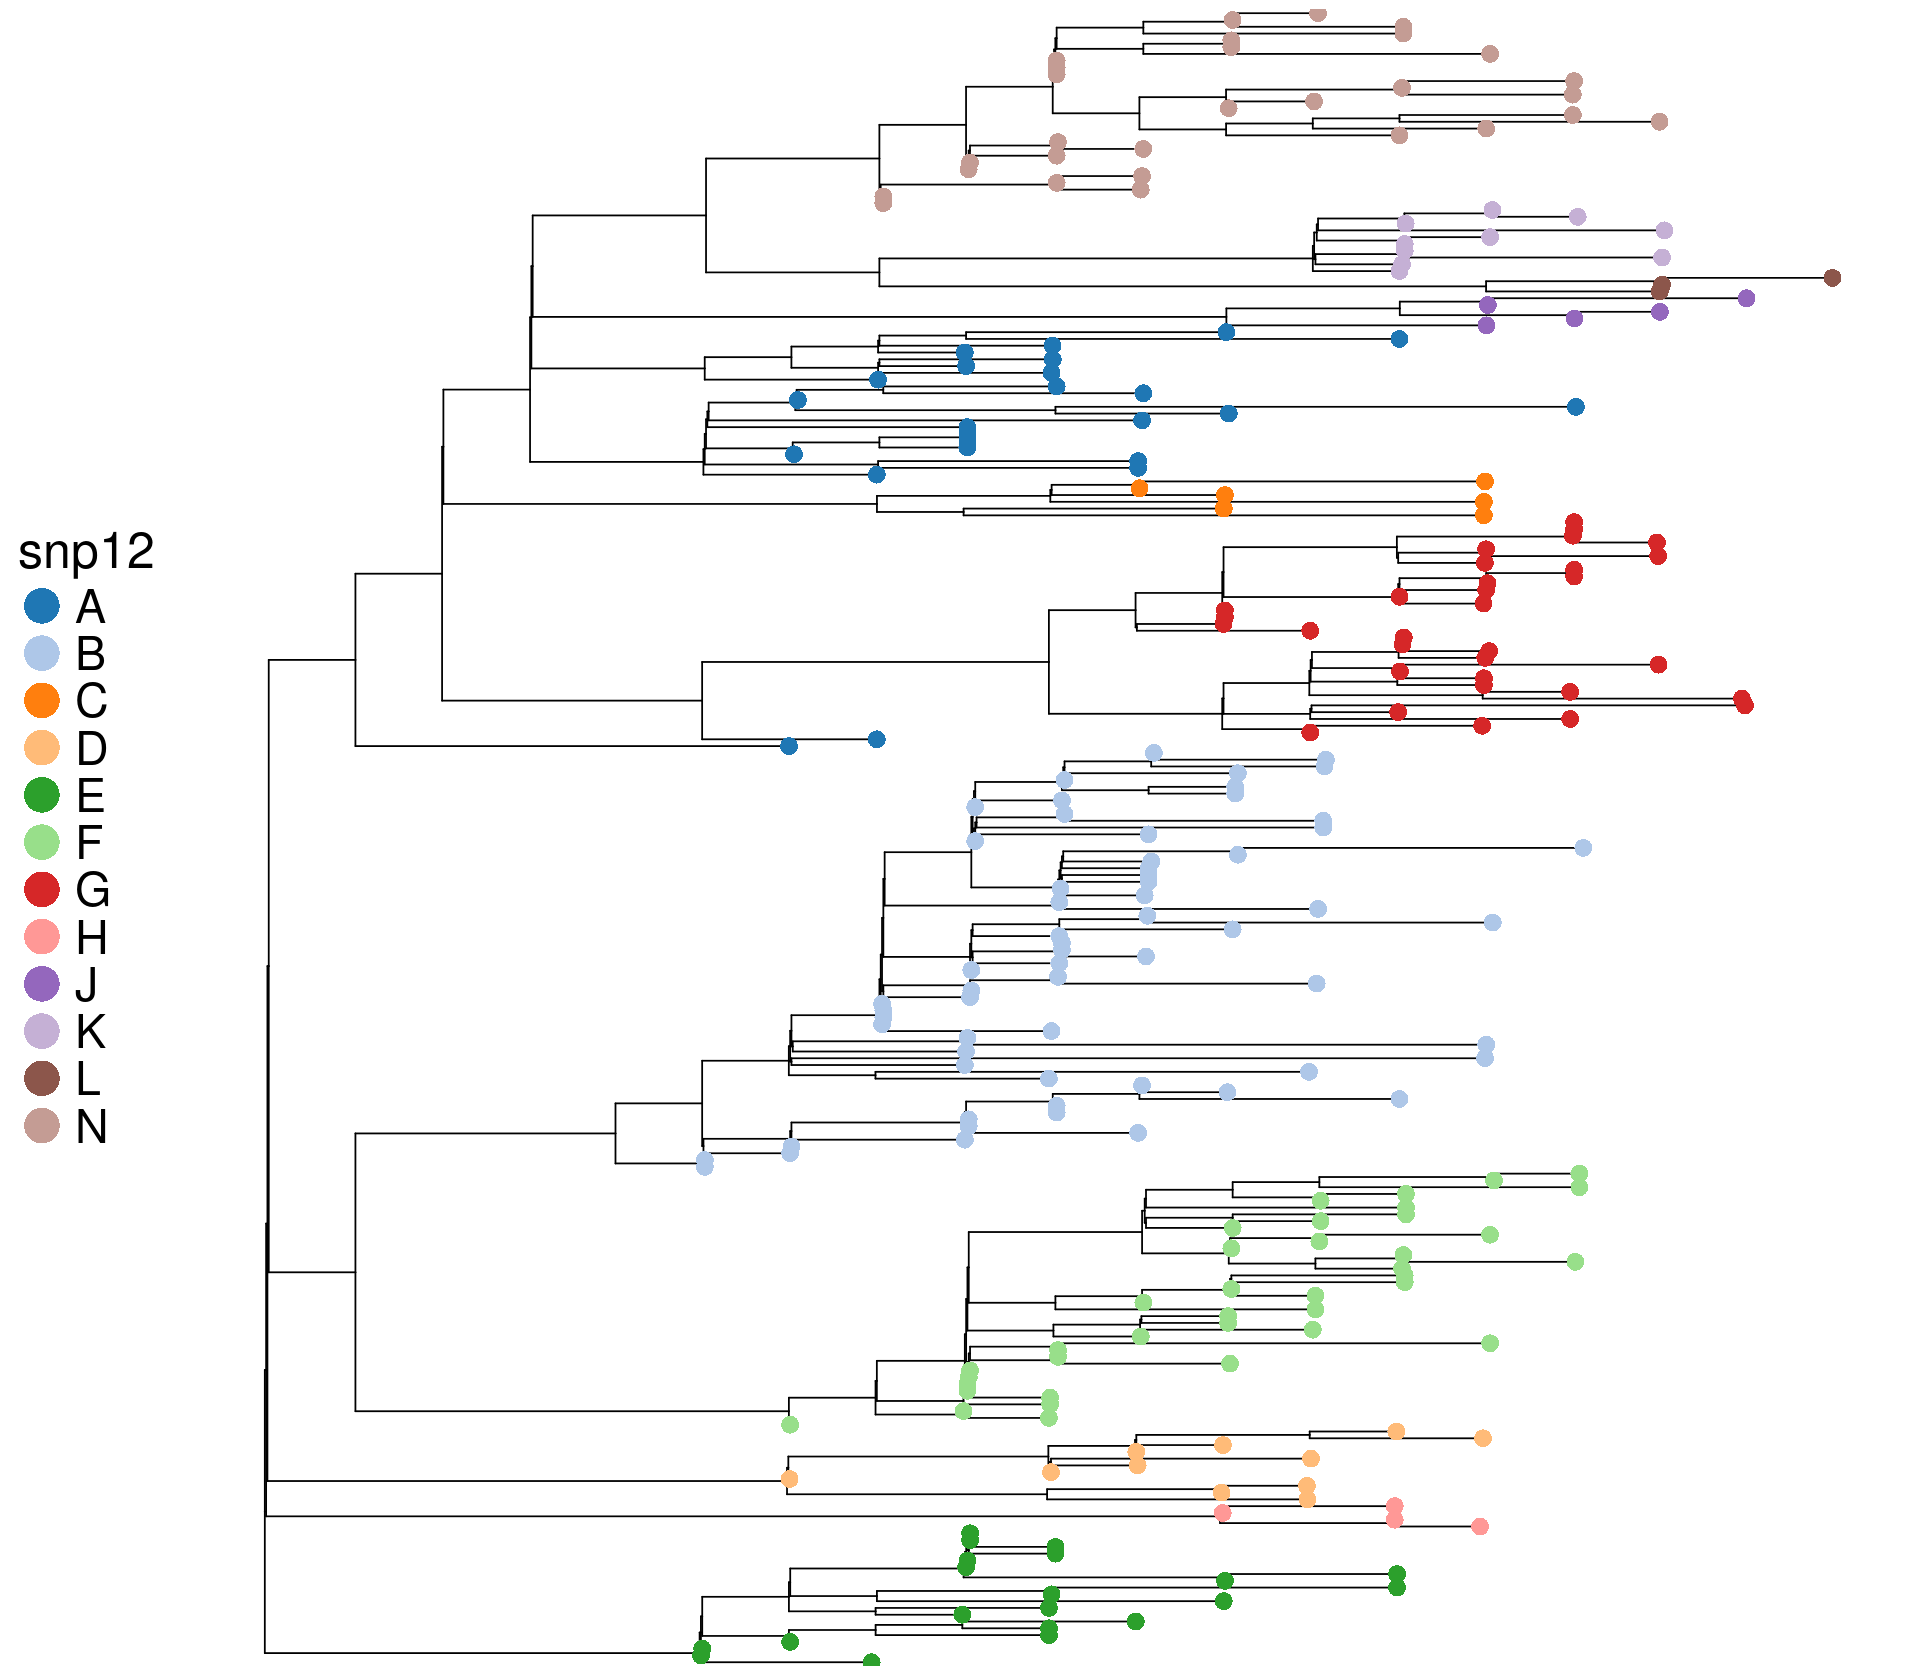

In [86]:
options(repr.plot.width=16, repr.plot.height=14)
submeta <- read.csv('figure6_clusters.csv',row.names=1)
scolors <- setNames(unique(submeta$color), unique(submeta$snp12))
tips <- rownames(submeta)
stree <- keep.tip(tree, tips)
p<-ggplottree(stree, submeta, layout='rect',cols=c('snp12'), cmaps=c('Set1'), colors=list(scolors), size=.5,
             offset=0, tipsize=5, legend.pointsize=10, legend.fontsize=28)#, scalebar=TRUE,)
p

Warning message in plot.window(...):
“"layout" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"layout" is not a graphical parameter”
Warning message in title(...):
“"layout" is not a graphical parameter”


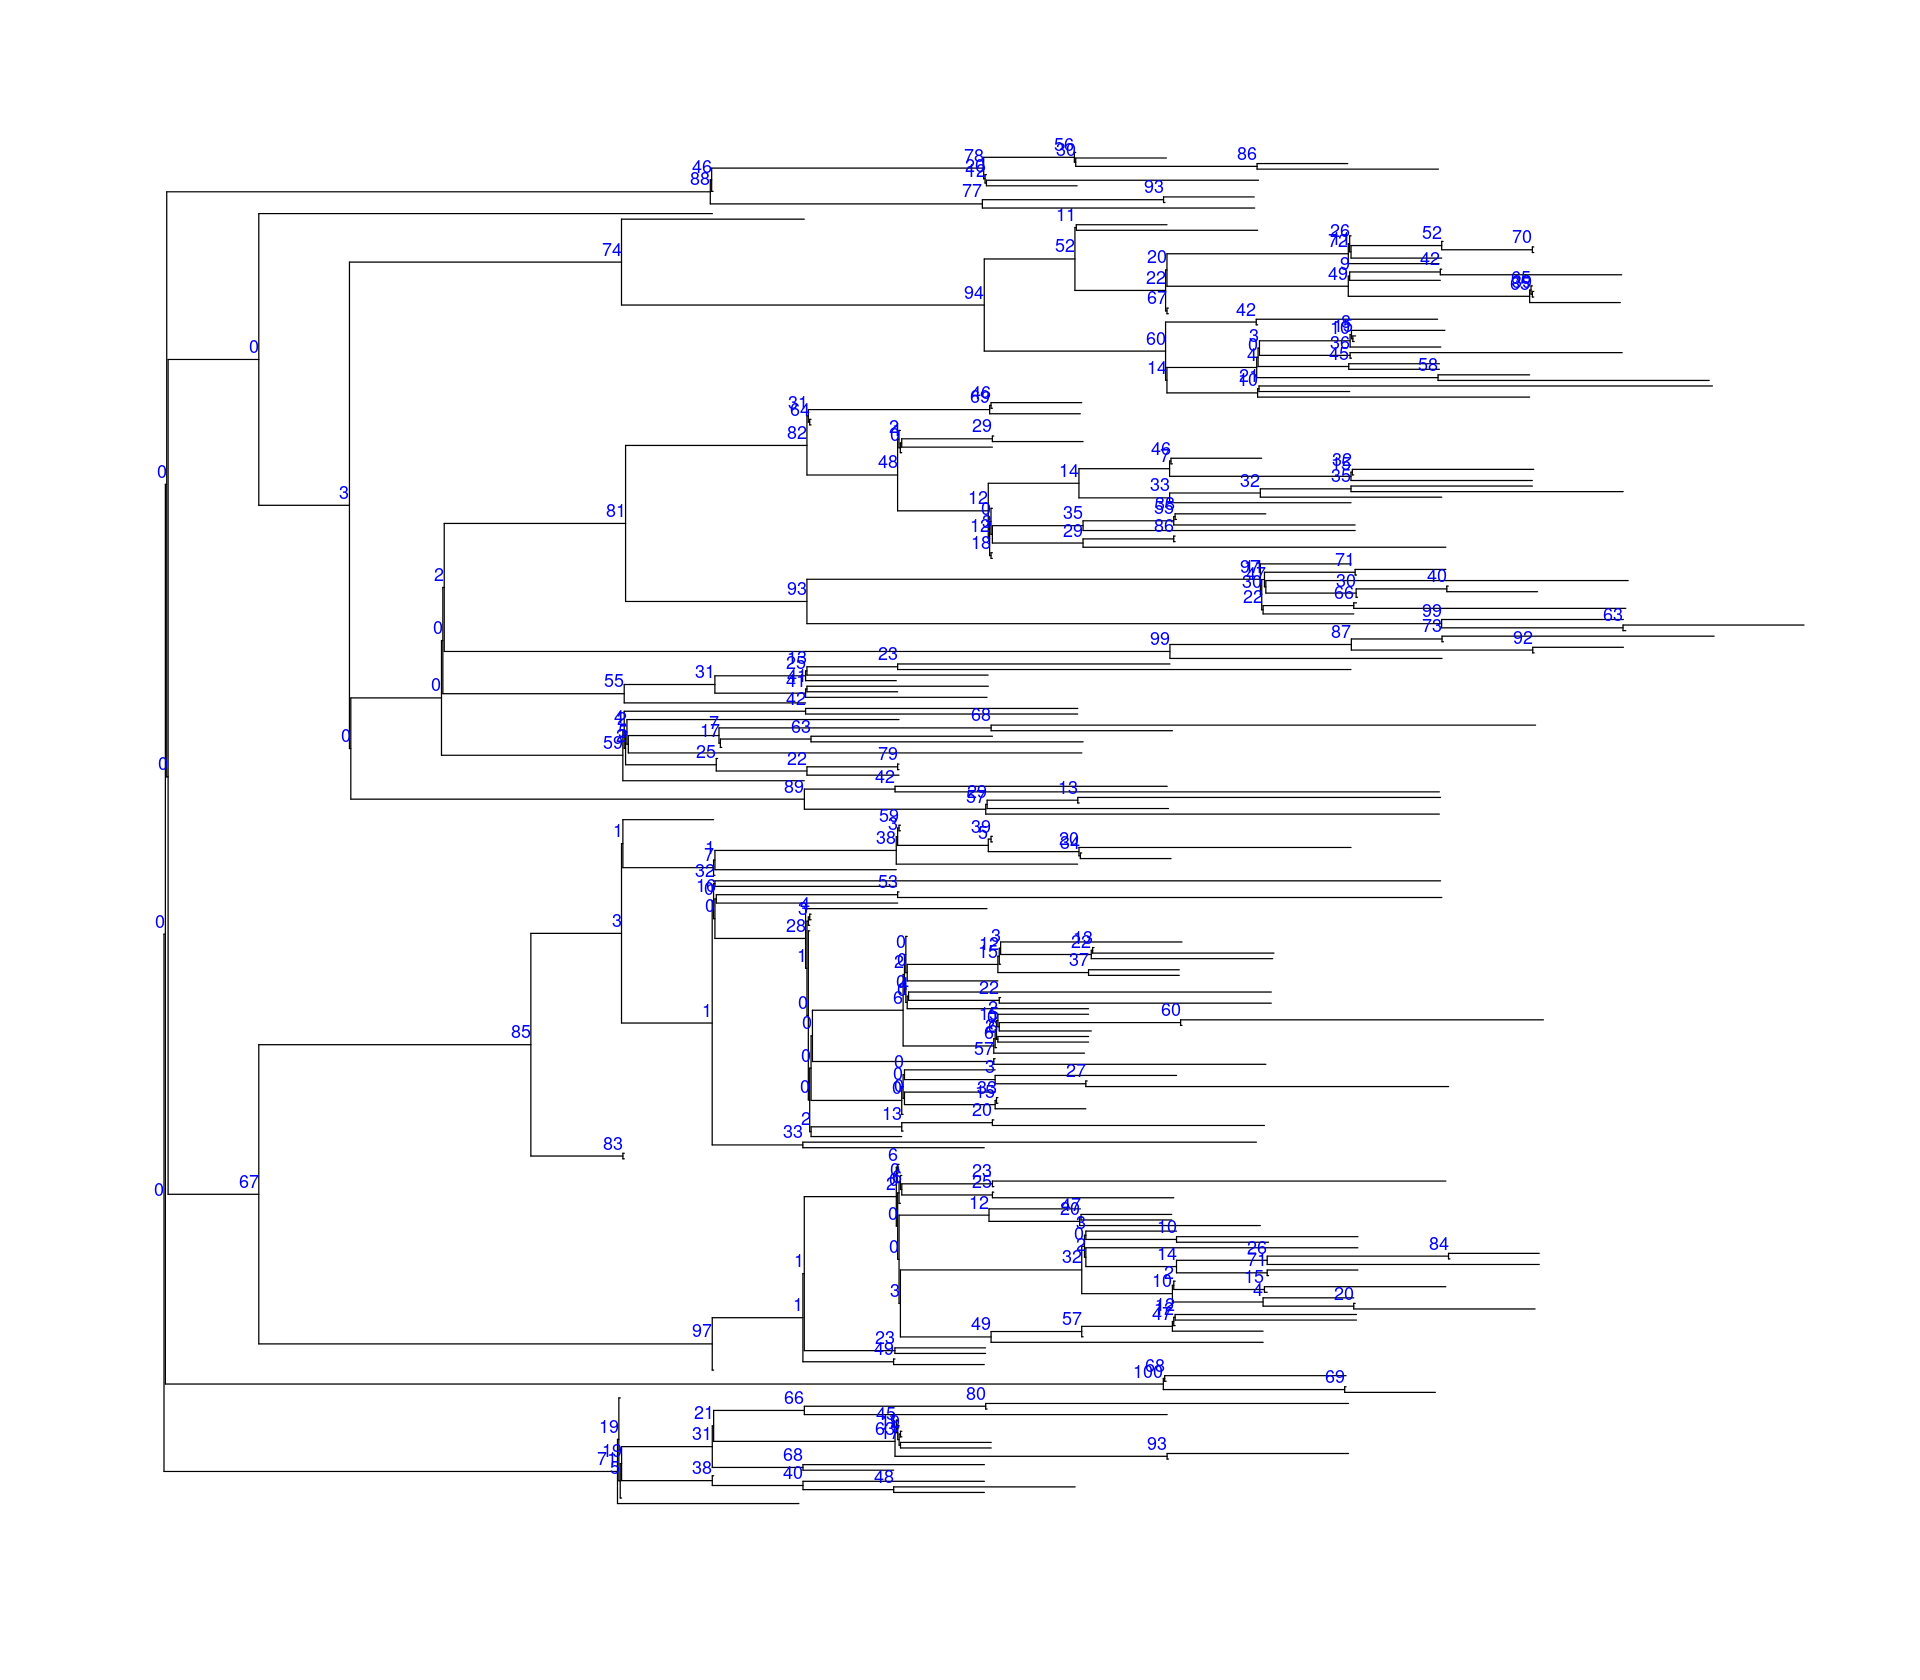

In [89]:
## show bootstrap values for dodgy clades?
plot(stree, show.node.label = FALSE, show.tip.label=FALSE)
nodelabels(stree$node.label, adj = c(1, -0.5), frame = "none", cex = 0.9, col = "blue")

## nicola cluster

In [111]:
bltree <- read.tree('/storage/btbgenie/all_ireland_results_new/tree_bl.newick')
nicmeta <- read.table('/storage/btbgenie/all_ireland_results_new/I193.csv',sep=',',header=TRUE,row.names=1,comment.char="")
nicmeta[] <- lapply(nicmeta, as.character)
nicmeta$our_cluster <- nicmeta$snp3 == "C"

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


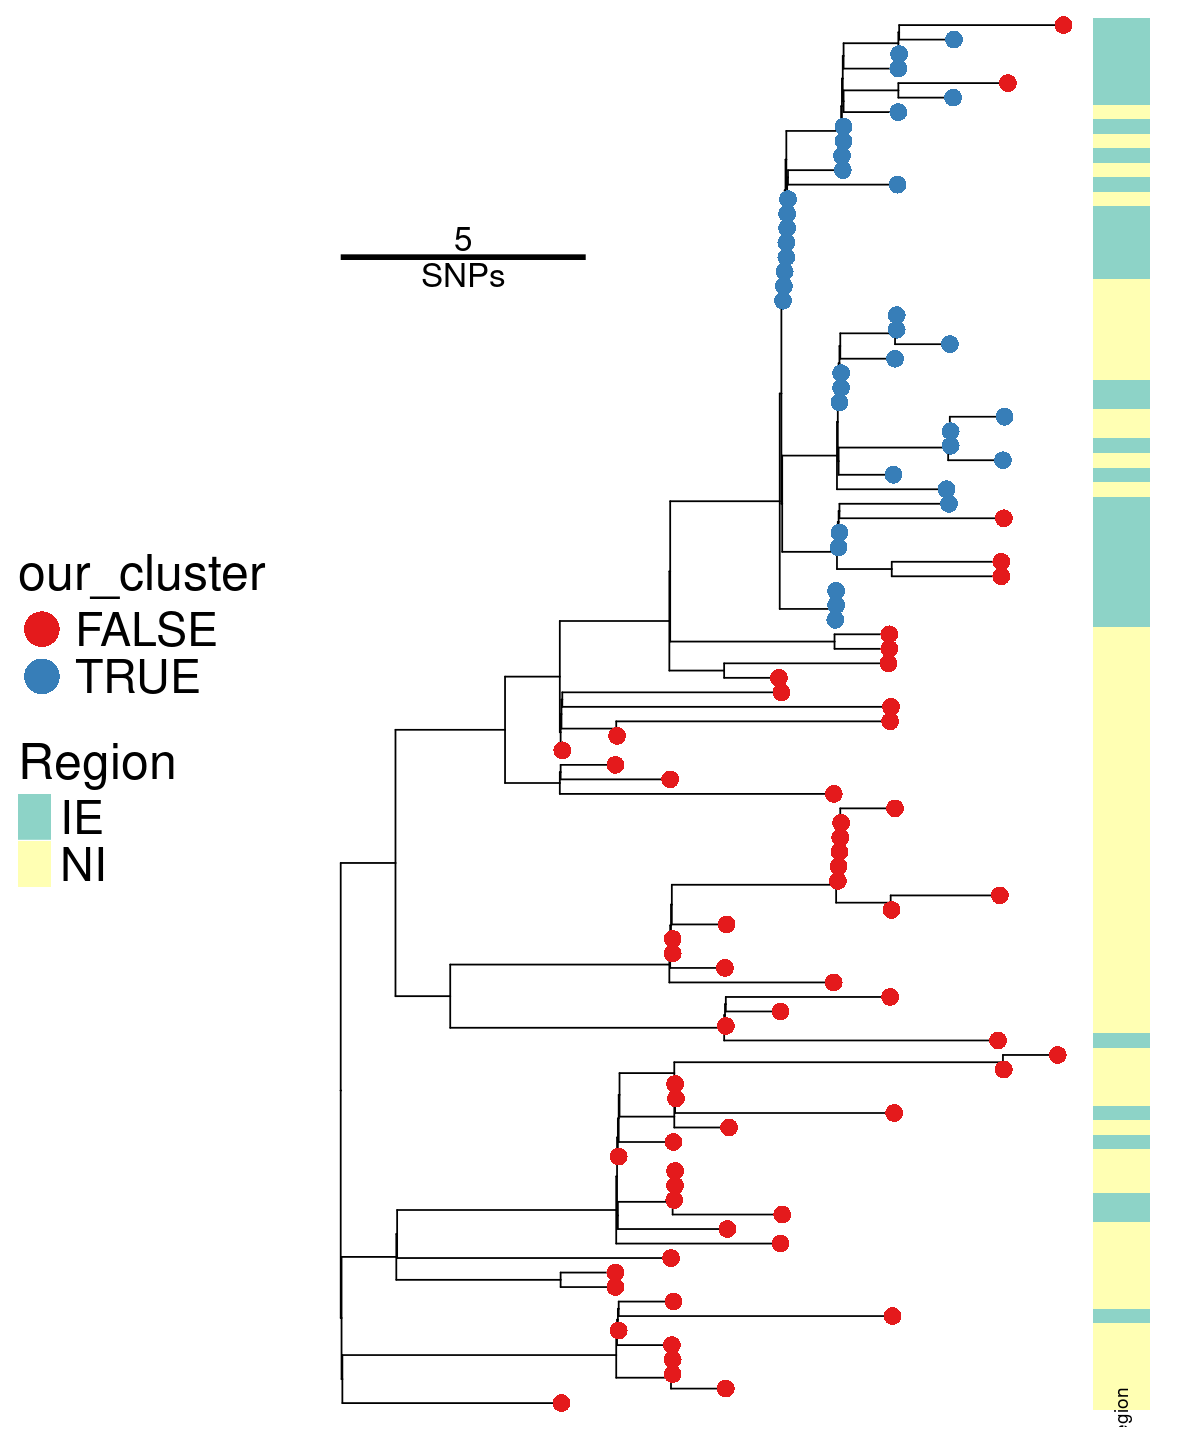

In [138]:
options(repr.plot.width=10, repr.plot.height=12)
tips <- rownames(meta[meta$short_name %in% c('I193'),])
stree <- keep.tip(bltree, tips)
drop<-c('BTB-Gen-254','BTB-Gen-014','TB20-001990','ERR4627341')
stree <- drop.tip(stree, drop)
p<-ggplottree(stree, nicmeta, layout='rect',cols=c('our_cluster','Region'), cmaps=c('Set1','Set3','Set2'), size=.5,
             offset=.0015, tipsize=5, legend.pointsize=10, legend.fontsize=28)#, tiplabel=TRUE)
p <- p + geom_treescale(x=0, y=80, width=5, offset = NULL,
                       label='SNPs', color="black", linesize = 1.6, fontsize = 7)
p

In [ ]:
library(igraph)

dist_matrix <- read.table('/storage/btbgenie/all_ireland_results_new/snpdist.csv',sep=',',header=TRUE,row.names=1,check.names = FALSE)
dm <- dist_matrix[tips,tips]

# Convert distance matrix to mst
graph <- graph.adjacency(dm, mode="undirected", weighted=TRUE, diag=FALSE)
mst <- mst(graph)
plot(mst, edge.label=E(mst)$weight, vertex.size=30, vertex.label.cex=1.2, main="Minimum Spanning Tree")